In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
ames = pd.read_csv('ames.csv', index_col=0)
ames.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,SaleType,SaleCondition,TotalBath,TotalSF,HQSF,yrsbtwn,BedxBath,RoomsxBath,FireplaceYN,TotalPorchSF
1,909176150,856,126000,30,RL,58.769231,7890,Pave,No Alley,Reg,...,WD,Normal,2.0,1712.0,1712.0,11,4.0,8.0,1,166
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,No Alley,Reg,...,WD,Normal,3.0,2098.0,2098.0,0,6.0,15.0,0,105
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No Alley,Reg,...,WD,Normal,1.0,1838.0,1838.0,77,2.0,5.0,0,282
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,No Alley,Reg,...,WD,Normal,1.0,1444.0,1444.0,103,2.0,6.0,0,279
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,No Alley,Reg,...,WD,Normal,3.5,2475.0,2475.0,0,10.5,21.0,0,45
6,908128060,1922,198500,85,RL,64.000000,7301,Pave,No Alley,Reg,...,ConLD,Normal,3.0,1922.0,1922.0,0,12.0,21.0,1,177
7,902135020,936,93000,20,RM,60.000000,6000,Pave,Pave,Reg,...,WD,Normal,1.0,1872.0,1872.0,0,2.0,4.0,0,144
8,528228540,1246,187687,20,RL,53.000000,3710,Pave,No Alley,Reg,...,New,Partial,2.0,2392.0,2392.0,1,4.0,10.0,1,124
9,923426010,889,137500,20,RL,74.000000,12395,Pave,No Alley,Reg,...,WD,Normal,1.0,1753.0,1753.0,0,3.0,6.0,0,0
10,908186050,1072,140000,180,RM,35.000000,3675,Pave,No Alley,Reg,...,WD,Normal,2.0,1619.0,1619.0,0,4.0,10.0,0,44


### SLR with Train-Test Split: Run a linear regression on every column vs SalePrice and Report R^2, beta, intercept

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

cat_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

results_list = []



for col in range(X_train.shape[1]):
    df_list = []
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X_train.iloc[:, [col]])
    else:
        transformed_col = X_train.iloc[:, [col]]
    
    X_feature_train, X_feature_test, Y_train, Y_test = train_test_split(transformed_col, y_train, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_feature_train, Y_train)
    
    Y_pred = model.predict(X_feature_test)
    
    r2 = r2_score(Y_test, Y_pred)
    
    col_name = X_train.columns[col]
    
    df_list.append(col_name)
    
    df_list.append(r2)
    
    coef_flat = model.coef_.flatten().tolist()
    
    df_list.append(coef_flat)
    
    df_list.append(model.intercept_[0])

    results_list.append(df_list)

results_list = sorted(results_list, key=lambda x: x[1], reverse = True)

slr_detailed = pd.DataFrame(results_list, columns = ['feature', 'r2', 'betas', 'intercept'])

slr_detailed

,feature,r2,betas,intercept
0,HQSF,0.701772,[77.21613680254939],-1.745936e+04
1,TotalSF,0.698450,[77.06908555009133],-1.744781e+04
2,OverallQual,0.602340,[42212.01016287305],-7.811674e+04
3,Neighborhood,0.548470,"[-49594.61527449699, -93844.61512463707, -7114...",1.980946e+05
4,ExterQual,0.529352,"[-276953.8389355737, -137450.13939144128, -219...",3.650303e+05
5,GrLivArea,0.527104,[105.44839060497975],2.019956e+04
6,RoomsxBath,0.480096,[6446.430484928959],8.319743e+04
7,KitchenQual,0.468366,"[-207785.32986111107, -108085.2447584921, 0.0,...",3.169376e+05
8,BsmtQual,0.447437,"[-207762.92721469887, -116473.39858224175, -20...",3.160435e+05
9,TotalBsmtSF,0.436160,[114.90786045489672],5.767245e+04


### 'Back of Envelope' Interpretation

In [4]:
slr_detailed.loc[0,:]
#By just plotting high quality square footage at a rate of $77.21/ft^2, you can explain about 70% of the saleprices.
#The intercept is a construct for the regression. (226 ft^2 before you're paying $0!)

feature                     HQSF
r2                      0.701772
betas        [77.21613680254939]
intercept          -17459.359146
Name: 0, dtype: object

In [5]:
slr_detailed.loc[2,:]

feature              OverallQual
r2                       0.60234
betas        [42212.01016287305]
intercept          -78116.742715
Name: 2, dtype: object

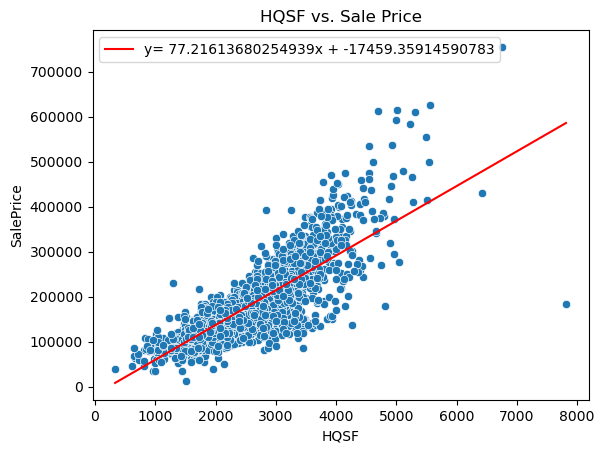

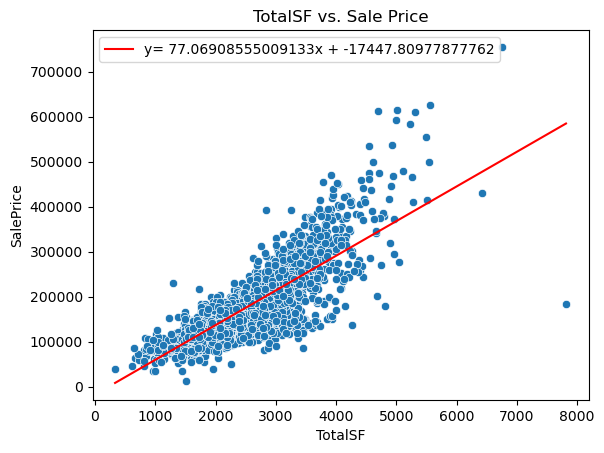

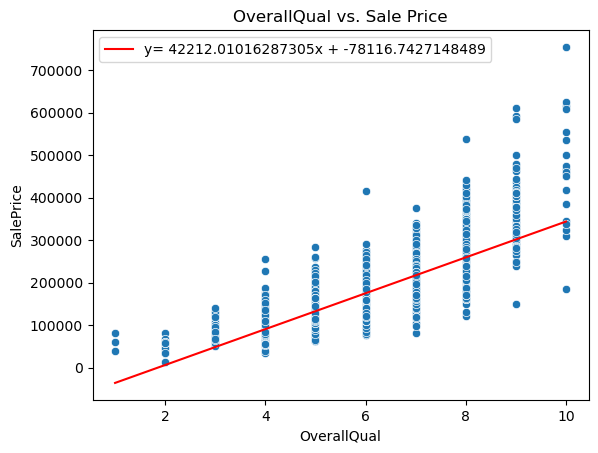

In [6]:
def numeric_slr_plot(myseries, df = ames):
    colname = myseries[0]
    R2 = myseries[1]
    m = myseries[2][0]
    b = myseries[3]
    
    mydf = df.loc[:, [colname, 'SalePrice']]
    sns.scatterplot(data = mydf, x = colname, y = 'SalePrice')
    x_vals = np.linspace(df[[colname]].min(), df[[colname]].max(), 100)
    y_vals = m*x_vals + b
    plt.plot(x_vals, y_vals, color='red', label= f'y= {m}x + {b}')
    plt.title(f"{colname} vs. Sale Price")
    plt.legend()
    plt.show()

#Plot numeric variables vs. SalePrice w/ regression line (try 0, 1, 2)
numeric_slr_plot(slr_detailed.loc[0,:], ames)
numeric_slr_plot(slr_detailed.loc[1,:], ames)
numeric_slr_plot(slr_detailed.loc[2,:], ames)

In [7]:
slr_detailed.loc[3, 'betas']
#df.loc[3, :]
#Neighborhood coefficients--- which of these are significant/have robust enough # of homes?
#We are talking about almost $200K difference here. Some of these neighborhoods only have 1 or 2 homes, and the
#p-values associated with each will certainly not be significant.

[-49594.61527449699,
 -93844.61512463707,
 -71144.97577890745,
 9963.298008158705,
 -4535.2038629650315,
 2105.3859319617577,
 -65968.19086601882,
 -9985.172831017999,
 -6844.615314050307,
 81905.38464371194,
 -90449.01934576307,
 -61094.61537672886,
 -97603.3107150738,
 -37096.696599377894,
 -53352.84143073371,
 -55833.90090578082,
 -5531.389287262127,
 125547.43092849312,
 108626.12736956871,
 -72266.11711478647,
 -65502.614950815376,
 -58583.821069452584,
 -7630.494550128224,
 27248.985002569185,
 111585.24206482976,
 50720.567006123754,
 53558.71815793986]

### Cross-Validation

In [8]:
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '{:.4f}'.format

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

cat_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

big_list = []

for col in range(X.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X.iloc[:, [col]])
    else:
        transformed_col = X.iloc[:, [col]]
    
    model = LinearRegression()
    
    col_name = X.columns[col]
    
    df_list = [col_name]
    
    cv_scores = cross_val_score(model, transformed_col, y, cv = 5)
    
    df_list.extend(cv_scores)
    
    df_list.extend([np.mean(cv_scores), np.std(cv_scores)])
    
    big_list.append(df_list)

big_list = sorted(big_list, key = lambda x: x[6], reverse = True)


slr_CV_df = pd.DataFrame(big_list, columns = ['Feature', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Avg', 'Std'])
    
slr_CV_df

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,HQSF,0.6698,0.6822,0.7277,0.6595,0.6102,0.6699,0.0379
1,TotalSF,0.6628,0.6797,0.7244,0.6656,0.5969,0.6659,0.0410
2,OverallQual,0.6178,0.6425,0.6178,0.6094,0.6026,0.6180,0.0135
3,Neighborhood,0.5444,0.5741,0.5362,0.5419,0.5062,0.5406,0.0216
4,GrLivArea,0.4884,0.5412,0.5214,0.5458,0.4672,0.5128,0.0305
5,BsmtQual,0.5169,0.5096,0.4386,0.3883,0.4716,0.4650,0.0476
6,ExterQual,0.5460,0.5167,0.4038,0.4313,0.4264,0.4649,0.0559
7,RoomsxBath,0.4445,0.4747,0.4751,0.3956,0.4829,0.4546,0.0323
8,KitchenQual,0.4772,0.5040,0.3819,0.3551,0.4666,0.4369,0.0578
9,TotalBsmtSF,0.5006,0.4278,0.4514,0.3474,0.3149,0.4084,0.0681


In [9]:
slr_CV_df['Feature']

0              HQSF
1           TotalSF
2       OverallQual
3      Neighborhood
4         GrLivArea
5          BsmtQual
6         ExterQual
7        RoomsxBath
8       KitchenQual
9       TotalBsmtSF
10        TotalBath
11       GarageCars
12         1stFlrSF
13       GarageArea
14        YearBuilt
15      FireplaceQu
16         FullBath
17     GarageFinish
18       Foundation
19     YearRemodAdd
20         BedxBath
21       MasVnrArea
22     TotRmsAbvGrd
23       Fireplaces
24       GarageType
25      FireplaceYN
26     BsmtFinType1
27       BsmtFinSF1
28        HeatingQC
29     BsmtExposure
30       MasVnrType
31     TotalPorchSF
32      Exterior1st
33      Exterior2nd
34      LotFrontage
35         MSZoning
36       WoodDeckSF
37         LotShape
38      OpenPorchSF
39         HalfBath
40       GarageQual
41     BsmtFullBath
42       GarageCond
43       PavedDrive
44         2ndFlrSF
45       CentralAir
46          LotArea
47       HouseStyle
48         SaleType
49      GarageYrBlt


In [10]:
slr_CV_toplot = slr_CV_df.iloc[:11,0:6]
slr_CV_toplot2 = slr_CV_df.iloc[11:21, 0:6]
slr_CV_toplot
slr_CV_toplot2

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5
11,GarageCars,0.4374,0.4118,0.3883,0.3656,0.3799
12,1stFlrSF,0.4765,0.4208,0.4072,0.3591,0.3147
13,GarageArea,0.4316,0.3942,0.3863,0.3933,0.3637
14,YearBuilt,0.3093,0.3088,0.2568,0.2534,0.2958
15,FireplaceQu,0.3246,0.3301,0.2656,0.2229,0.2588
16,FullBath,0.2343,0.3195,0.3041,0.2738,0.2620
17,GarageFinish,0.3098,0.2876,0.2606,0.2575,0.2714
18,Foundation,0.2798,0.2799,0.2317,0.2567,0.2245
19,YearRemodAdd,0.2663,0.3014,0.2191,0.1994,0.2669
20,BedxBath,0.2234,0.2204,0.2784,0.2050,0.2850


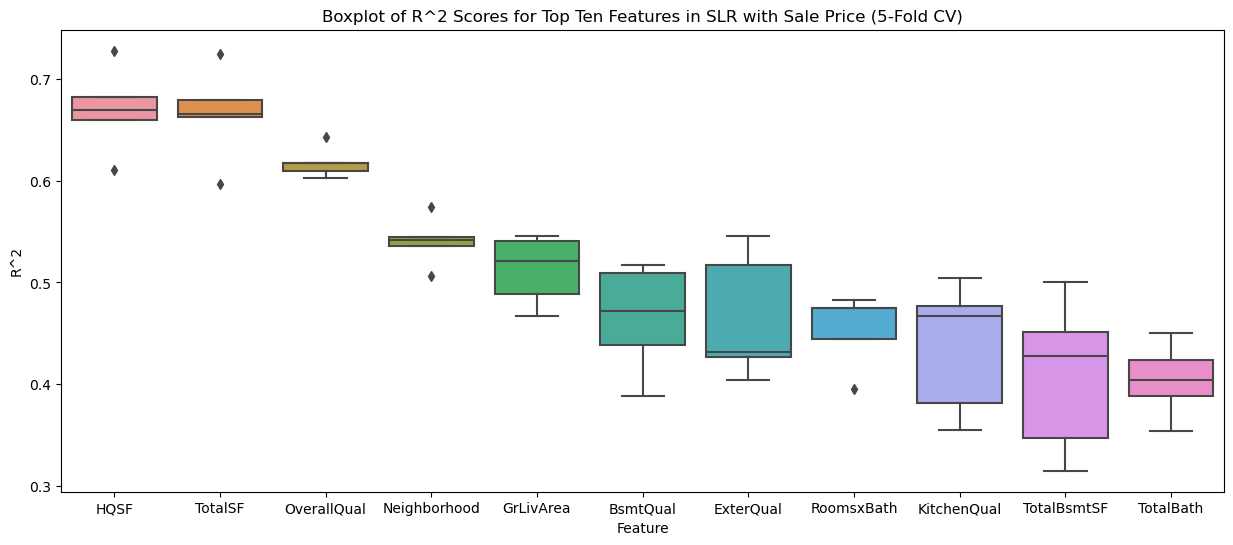

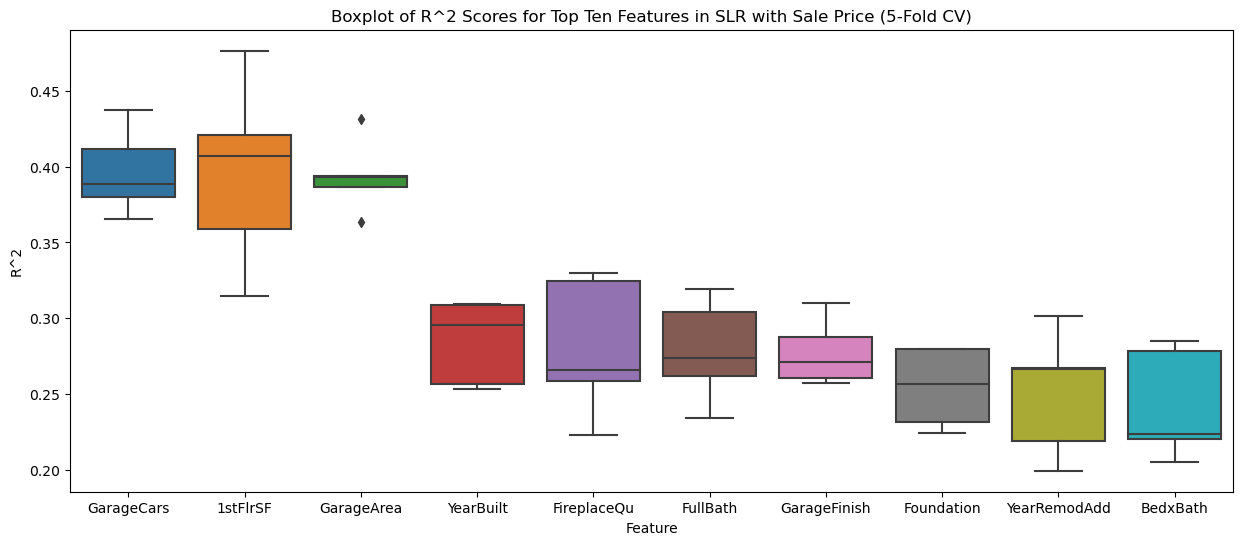

In [11]:
df_long = slr_CV_toplot.melt(id_vars='Feature', var_name='Fold', value_name='R^2')
df_long2 = slr_CV_toplot2.melt(id_vars='Feature', var_name='Fold', value_name='R^2')

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long2)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

# Multiple Linear Regression
With some clear insight through simple linear regression, the next step is multiple linear regression. I want to combine ~5 of these variables and create a model that is reasonably accurate (R^2 > .73) while still remaining as interpretable as possible. Could you stil explain the equation on the back of an envelope?

In [12]:
top14 = slr_CV_df['Feature'][:14].tolist()
print(top14)
#Multicollinearity concerns- edit down to
top11 = ['HQSF', 'OverallQual', 'Neighborhood', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

['HQSF', 'TotalSF', 'OverallQual', 'Neighborhood', 'GrLivArea', 'BsmtQual', 'ExterQual', 'RoomsxBath', 'KitchenQual', 'TotalBsmtSF', 'TotalBath', 'GarageCars', '1stFlrSF', 'GarageArea']


In [13]:
#pd.options.display.float_format = '{:.4f}'.format
from itertools import combinations

def my_mlr(subset_list, df):
    
    y = df['SalePrice']
    results_list = []

    for subset in subset_list:
        X = df[subset]

        cat_cols = [col for col in X.columns if X[col].dtype == 'object']

        if cat_cols:
            encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
            transformed_X = encoder.fit_transform(X[cat_cols])
            transformed_X = pd.DataFrame(transformed_X.toarray(), columns=encoder.get_feature_names_out())
            transformed_X.reset_index(drop=True, inplace=True)  # Reset index
            X.reset_index(drop=True, inplace=True)  # Reset index for X as well
            X = pd.concat([X.drop(columns=cat_cols), transformed_X], axis=1)

        model = LinearRegression()
        cv_scores = cross_val_score(model, X, y, cv=5)

        df_list = [subset] + list(cv_scores) + [np.mean(cv_scores), np.std(cv_scores)]
        results_list.append(df_list)
        
        results_list = sorted(results_list, key = lambda x: x[6], reverse = True)

    CV_df = pd.DataFrame(results_list, columns=['Features'] + [f'Fold{i}' for i in range(1, 6)] + ['Avg', 'Std'])

    return CV_df

pairs = combinations(top14, 2)
top14_pairings = [list(pair) for pair in pairs]
mlr_2_CV_df = my_mlr(top14_pairings, ames)
mlr_2_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual]",0.7660,0.7900,0.8140,0.7849,0.7791,0.7868,0.0158
1,"[TotalSF, OverallQual]",0.7639,0.7898,0.8124,0.7875,0.7742,0.7856,0.0164
2,"[HQSF, Neighborhood]",0.7799,0.7987,0.8134,0.7762,0.7554,0.7847,0.0199
3,"[TotalSF, Neighborhood]",0.7778,0.7987,0.8124,0.7825,0.7509,0.7845,0.0208
4,"[HQSF, BsmtQual]",0.7695,0.7895,0.8146,0.7410,0.7411,0.7712,0.0284
5,"[TotalSF, BsmtQual]",0.7663,0.7888,0.8125,0.7454,0.7355,0.7697,0.0282
6,"[HQSF, ExterQual]",0.7617,0.7937,0.7852,0.7623,0.7405,0.7687,0.0189
7,"[TotalSF, ExterQual]",0.7585,0.7933,0.7829,0.7674,0.7323,0.7669,0.0211
8,"[HQSF, KitchenQual]",0.7381,0.7815,0.7785,0.7604,0.7477,0.7613,0.0169
9,"[TotalSF, KitchenQual]",0.7334,0.7804,0.7762,0.7638,0.7377,0.7583,0.0194


In [14]:
def cvplot(df):
    toplot1 = df.iloc[:11, 0:6]
    toplot2 = df.iloc[11:21, 0:6]
    
    df_long = toplot1.melt(id_vars='Features', var_name='Fold', value_name='R^2')
    df_long2 = toplot2.melt(id_vars='Features', var_name='Fold', value_name='R^2')

    df_long['Features'] = df_long['Features'].apply(lambda x: ', '.join(map(str, x)))
    df_long2['Features'] = df_long2['Features'].apply(lambda x: ', '.join(map(str, x)))
    
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Features', y='R^2', data=df_long)
    plt.title('Boxplot of R^2 Scores for Top Ten Groupings in MLR with Sale Price (5-Fold CV)')
    plt.xlabel('Features')
    plt.ylabel('R^2')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Features', y='R^2', data=df_long2)
    plt.title('Boxplot of R^2 Scores for Top Ten Groupings in MLR with Sale Price (5-Fold CV)')
    plt.xlabel('Features')
    plt.ylabel('R^2')
    plt.xticks(rotation=45)
    plt.show()

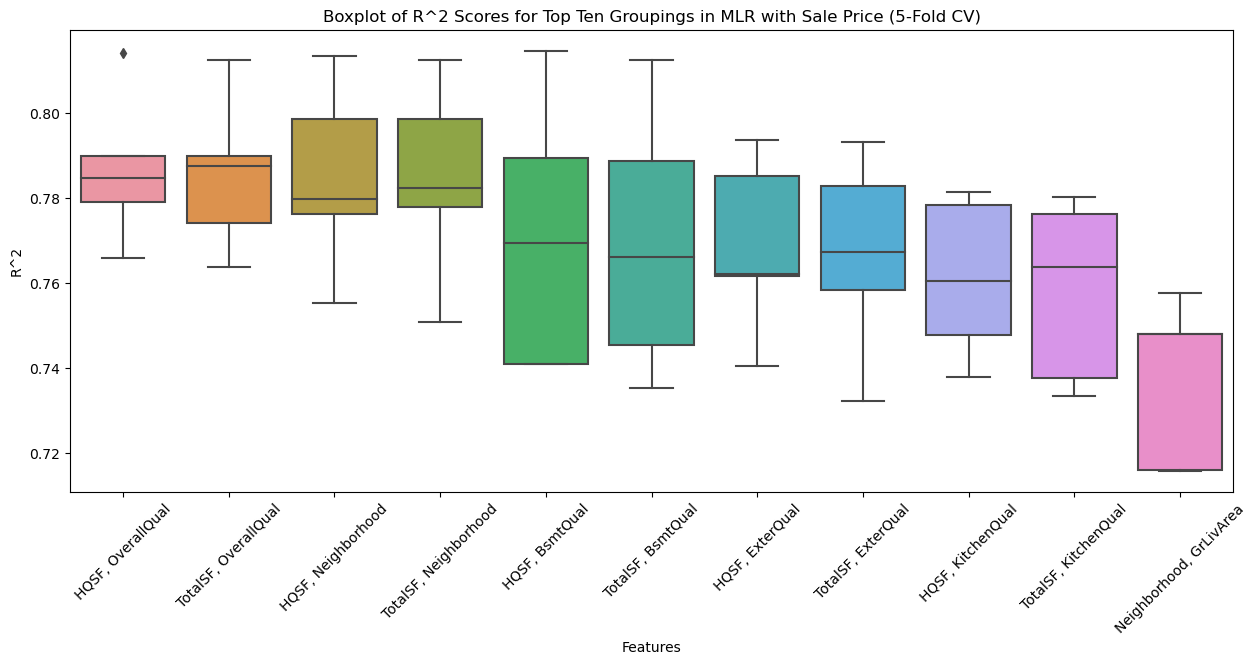

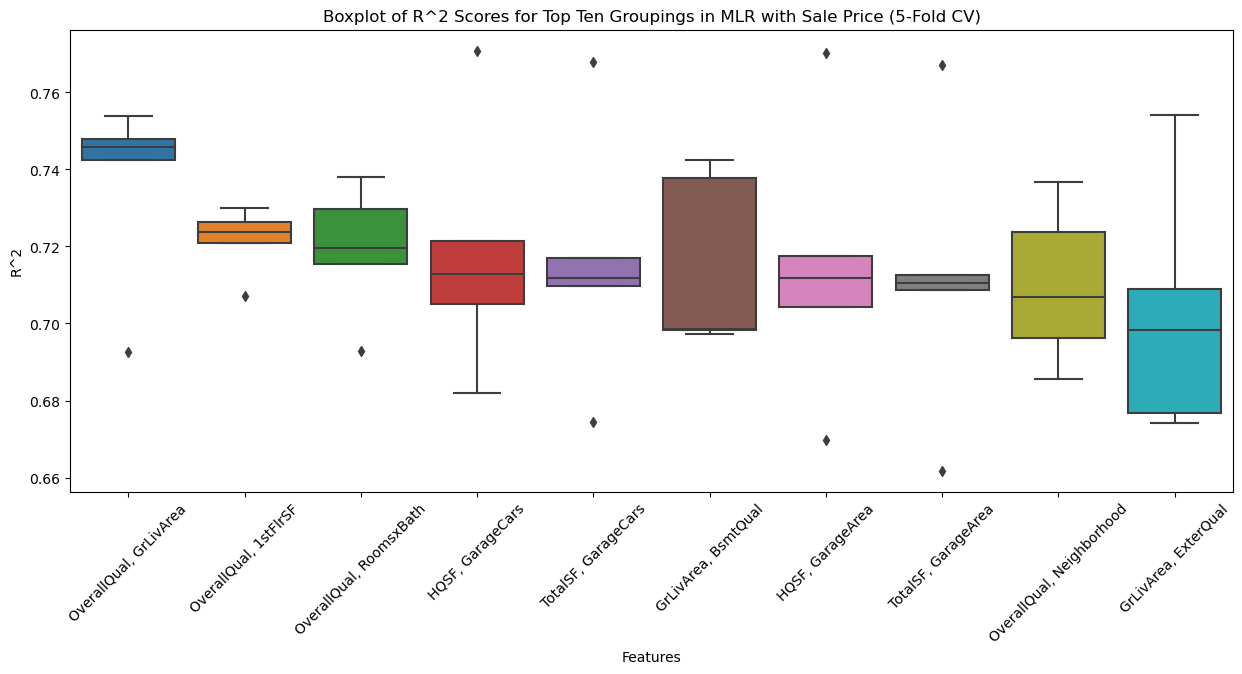

In [16]:
cvplot(mlr_2_CV_df)

In [17]:
for x in range(50):
    print(mlr_2_CV_df.iloc[x, 0])

['HQSF', 'OverallQual']
['TotalSF', 'OverallQual']
['HQSF', 'Neighborhood']
['TotalSF', 'Neighborhood']
['HQSF', 'BsmtQual']
['TotalSF', 'BsmtQual']
['HQSF', 'ExterQual']
['TotalSF', 'ExterQual']
['HQSF', 'KitchenQual']
['TotalSF', 'KitchenQual']
['Neighborhood', 'GrLivArea']
['OverallQual', 'GrLivArea']
['OverallQual', '1stFlrSF']
['OverallQual', 'RoomsxBath']
['HQSF', 'GarageCars']
['TotalSF', 'GarageCars']
['GrLivArea', 'BsmtQual']
['HQSF', 'GarageArea']
['TotalSF', 'GarageArea']
['OverallQual', 'Neighborhood']
['GrLivArea', 'ExterQual']
['HQSF', 'TotalBath']
['TotalSF', 'TotalBath']
['OverallQual', 'TotalBsmtSF']
['OverallQual', 'TotalBath']
['HQSF', 'RoomsxBath']
['OverallQual', 'GarageArea']
['GrLivArea', 'KitchenQual']
['TotalSF', 'RoomsxBath']
['Neighborhood', 'RoomsxBath']
['Neighborhood', '1stFlrSF']
['OverallQual', 'BsmtQual']
['HQSF', 'TotalBsmtSF']
['HQSF', '1stFlrSF']
['HQSF', 'GrLivArea']
['HQSF', 'TotalSF']
['OverallQual', 'KitchenQual']
['OverallQual', 'GarageCars']
['

In [15]:
def mlr_coefs(subset, df):
    
    y = df['SalePrice']
    results_list = []

    X = df[subset]

    cat_cols = [col for col in X.columns if X[col].dtype == 'object']

    if cat_cols:
        encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
        transformed_X = encoder.fit_transform(X[cat_cols])
        transformed_X = pd.DataFrame(transformed_X.toarray(), columns=encoder.get_feature_names_out())
        transformed_X.reset_index(drop=True, inplace=True)  # Reset index
        X.reset_index(drop=True, inplace=True)  # Reset index for X as well
        X = pd.concat([X.drop(columns=cat_cols), transformed_X], axis=1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    r2 = r2_score(Y_test, Y_pred)
    
    print(f'R2: {r2}')
    print(f' coefs: {model.coef_.flatten().tolist()}')
    print(f' intercept: {model.intercept_}')

In [16]:
for x in range(5):
    print(mlr_2_CV_df.iloc[x,0])
    mlr_coefs(mlr_2_CV_df.iloc[x, 0], ames) 

['HQSF', 'OverallQual']
R2: 0.8010786074405741
 coefs: [51.53028559099342, 23829.16600955244]
 intercept: -95981.33483131166
['TotalSF', 'OverallQual']
R2: 0.798250755665172
 coefs: [51.29987493051677, 23982.50037524226]
 intercept: -96547.80134990491
['HQSF', 'Neighborhood']
R2: 0.7807301411844932
 coefs: [58.007609131395, -6088.735694235802, -31302.99533904086, -30162.989904090227, -4438.500246616127, 3345.7245272255545, 5007.534516106901, -33886.52339211761, 3804.8892418552036, 19440.044069862437, 114229.95353271539, -45514.09692773511, -17197.52844557125, -40206.36762390621, -15500.229732746697, -30301.01067088399, -24786.52323941715, -16794.786966733627, 55930.24685587443, 64270.532443634074, -42526.91034010732, -43584.51520634345, -25844.539659105147, -7559.327167623516, 27210.28927870937, 77203.59973835382, 19552.86484589095, 25071.114878227527]
 intercept: 41082.690639351116
['TotalSF', 'Neighborhood']
R2: 0.7774484506494083
 coefs: [57.912352034700184, -6167.599044589384, -314

In [17]:
#or, select from these top pairings to see how their coefficients change, go for interpretability.
#Ditch all with 'OverallQual'
trimmed_list = []
for x in range(50):
    top_pair= mlr_2_CV_df.iloc[x, 0]
    if 'OverallQual' not in top_pair:
        trimmed_list.append(top_pair)   

In [18]:
for subset in trimmed_list:
    print(subset)
    mlr_coefs(subset, ames)   

['HQSF', 'Neighborhood']
R2: 0.7807301411844932
 coefs: [58.007609131395, -6088.735694235802, -31302.99533904086, -30162.989904090227, -4438.500246616127, 3345.7245272255545, 5007.534516106901, -33886.52339211761, 3804.8892418552036, 19440.044069862437, 114229.95353271539, -45514.09692773511, -17197.52844557125, -40206.36762390621, -15500.229732746697, -30301.01067088399, -24786.52323941715, -16794.786966733627, 55930.24685587443, 64270.532443634074, -42526.91034010732, -43584.51520634345, -25844.539659105147, -7559.327167623516, 27210.28927870937, 77203.59973835382, 19552.86484589095, 25071.114878227527]
 intercept: 41082.690639351116
['TotalSF', 'Neighborhood']
R2: 0.7774484506494083
 coefs: [57.912352034700184, -6167.599044589384, -31404.06311863397, -30588.725093216693, -4702.241447364166, 3337.256833544449, 4714.465727421028, -34088.677413753525, 3759.495364317186, 19402.567206391323, 114177.51450098475, -46500.403718767586, -17268.97126809252, -40301.28451668417, -15533.303429706

### Three Variables

In [19]:
trips = combinations(top14, 3)
top14_trips = [list(trip) for trip in trips]
mlr_3_CV_df = my_mlr(top14_trips, ames)
mlr_3_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood]",0.8032,0.8283,0.8425,0.8333,0.8167,0.8248,0.0137
1,"[TotalSF, OverallQual, Neighborhood]",0.8024,0.8286,0.8418,0.8372,0.8140,0.8248,0.0147
2,"[HQSF, OverallQual, BsmtQual]",0.8032,0.8314,0.8447,0.8127,0.8197,0.8223,0.0145
3,"[TotalSF, OverallQual, BsmtQual]",0.8017,0.8313,0.8432,0.8153,0.8162,0.8215,0.0143
4,"[HQSF, Neighborhood, KitchenQual]",0.8012,0.8287,0.8390,0.8202,0.8120,0.8202,0.0131
...,...,...,...,...,...,...,...,...
359,"[TotalBsmtSF, GarageCars, GarageArea]",0.6352,0.5726,0.6069,0.5493,0.5156,0.5759,0.0420
360,"[TotalBsmtSF, 1stFlrSF, GarageArea]",0.6283,0.5678,0.6012,0.5597,0.5201,0.5754,0.0370
361,"[RoomsxBath, TotalBath, GarageCars]",0.5909,0.5686,0.5966,0.5296,0.5867,0.5745,0.0243
362,"[GarageCars, 1stFlrSF, GarageArea]",0.6167,0.5667,0.5748,0.5309,0.5245,0.5627,0.0333


In [20]:
pd.set_option('display.max_rows', 500)
mlr_3_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood]",0.8032,0.8283,0.8425,0.8333,0.8167,0.8248,0.0137
1,"[TotalSF, OverallQual, Neighborhood]",0.8024,0.8286,0.8418,0.8372,0.8140,0.8248,0.0147
2,"[HQSF, OverallQual, BsmtQual]",0.8032,0.8314,0.8447,0.8127,0.8197,0.8223,0.0145
3,"[TotalSF, OverallQual, BsmtQual]",0.8017,0.8313,0.8432,0.8153,0.8162,0.8215,0.0143
4,"[HQSF, Neighborhood, KitchenQual]",0.8012,0.8287,0.8390,0.8202,0.8120,0.8202,0.0131
5,"[TotalSF, Neighborhood, KitchenQual]",0.7997,0.8287,0.8381,0.8247,0.8068,0.8196,0.0142
6,"[HQSF, Neighborhood, ExterQual]",0.8060,0.8389,0.8352,0.8087,0.7973,0.8172,0.0167
7,"[TotalSF, Neighborhood, ExterQual]",0.8046,0.8393,0.8343,0.8146,0.7932,0.8172,0.0175
8,"[HQSF, Neighborhood, BsmtQual]",0.8093,0.8272,0.8428,0.7961,0.7920,0.8135,0.0191
9,"[HQSF, OverallQual, KitchenQual]",0.7891,0.8221,0.8264,0.8118,0.8178,0.8134,0.0131


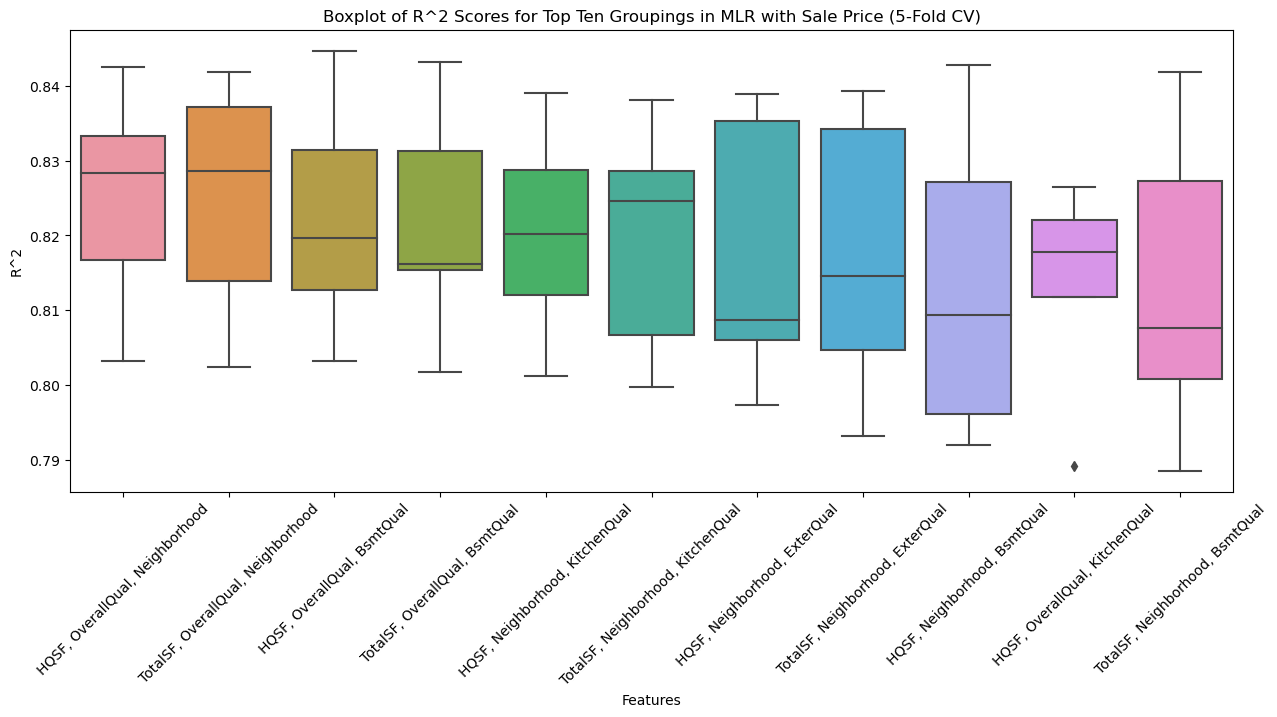

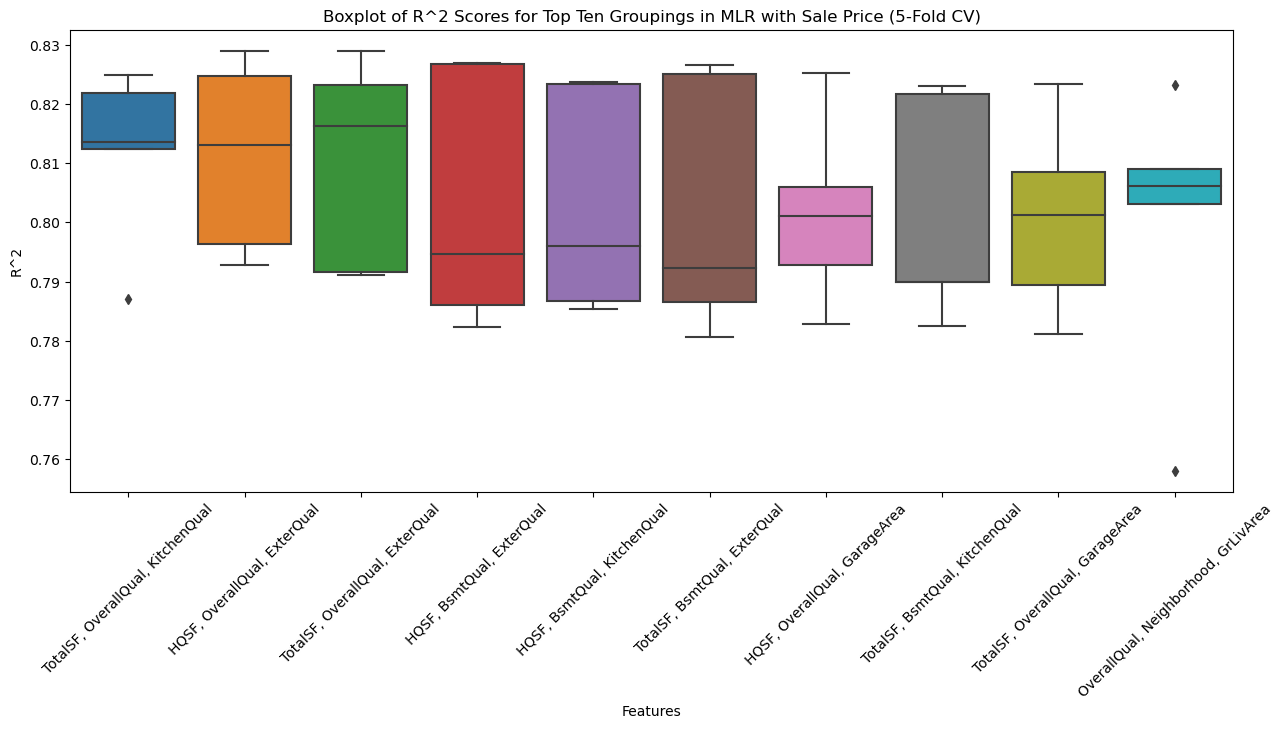

In [21]:
cvplot(mlr_3_CV_df)

In [22]:
#Trim top trips with 'OverallQual' inside
trimmed_list = []
for x in range(50):
    top_trip= mlr_3_CV_df.iloc[x, 0]
    if 'OverallQual' not in top_trip:
        trimmed_list.append(top_trip)

for subset in trimmed_list:
    print(subset)
    mlr_coefs(subset, ames)  

['HQSF', 'Neighborhood', 'KitchenQual']
R2: 0.82321432382492
 coefs: [51.193369722450704, 272.07813370191434, -25080.73355577233, -20529.074794831755, 10606.160650252865, 4922.753956597823, 13523.422111326128, -25464.687348224757, 10240.129230239147, 19208.581192727186, 110478.71473808955, -34720.13559081305, -5162.032809989127, -30462.45867096774, -4684.062843254361, -19078.304841390935, -12372.082339173481, -6576.977820819876, 59229.43421339772, 43229.347349289834, -35143.19029823196, -30158.994890021, -14531.94904886809, -4383.680696221486, 23191.017114230915, 60108.39944507648, 21316.667867973323, 21762.32789694966, -82741.17360752914, -54363.7791225618, -114883.99309536659, -71509.95431485496]
 intercept: 113844.9161660632
['TotalSF', 'Neighborhood', 'KitchenQual']
R2: 0.8195777647178886
 coefs: [51.117999110941554, 231.39773623645306, -25126.030567111407, -20951.989363201137, 10387.82848677008, 4929.2831345305, 13257.15607289121, -25657.769747093935, 10218.088155953477, 19183.360

R2: 0.789621904902227
 coefs: [52.87500630206588, 18661.448401859023, -136579.04672931443, -84128.25284201717, -119436.35613697312]
 intercept: 116642.86975957824
['HQSF', 'ExterQual', 'GarageArea']
R2: 0.7983715339551767
 coefs: [53.52495312950304, 60.44119164387337, -137544.2232876571, -82233.35075125528, -119268.60843905235]
 intercept: 118831.68524002604
['HQSF', 'ExterQual', 'KitchenQual']
R2: 0.8004246839635745
 coefs: [57.02437392734401, -109861.8353791684, -58048.71803015389, -86339.81892512724, -70385.49851571853, -37261.10350442002, -70058.50918180215, -55527.46987591739]
 intercept: 154810.7007839141
['Neighborhood', 'GrLivArea', 'BsmtQual']
R2: 0.8026773436203334
 coefs: [69.33075109120098, -32659.71514674787, -54540.929025521946, -41448.397005057835, -6801.748867439412, -5254.6448130087865, -7608.482829603352, -44077.93116739785, -21238.578430920035, 15681.427541127798, 108435.40809100078, -60285.32723094274, -51722.67311755969, -67141.21729274585, -24393.976920792706, -27

### Four Variables

In [23]:
quads = combinations(top14, 4)
top14_quads = [list(quad) for quad in quads]
mlr_4_CV_df = my_mlr(top14_quads, ames)
mlr_4_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood, KitchenQual]",0.8186,0.8455,0.8570,0.8524,0.8458,0.8438,0.0133
1,"[TotalSF, OverallQual, Neighborhood, KitchenQual]",0.8180,0.8457,0.8563,0.8555,0.8422,0.8435,0.0139
2,"[HQSF, OverallQual, Neighborhood, BsmtQual]",0.8220,0.8478,0.8627,0.8441,0.8378,0.8429,0.0133
3,"[TotalSF, OverallQual, Neighborhood, BsmtQual]",0.8213,0.8481,0.8619,0.8473,0.8355,0.8428,0.0136
4,"[TotalSF, OverallQual, Neighborhood, ExterQual]",0.8191,0.8554,0.8537,0.8506,0.8257,0.8409,0.0153
...,...,...,...,...,...,...,...,...
996,"[RoomsxBath, TotalBsmtSF, TotalBath, 1stFlrSF]",0.6559,0.6403,0.6998,0.5973,0.6207,0.6428,0.0346
997,"[GrLivArea, RoomsxBath, GarageCars, GarageArea]",0.6415,0.6454,0.6641,0.6371,0.6243,0.6425,0.0129
998,"[ExterQual, KitchenQual, GarageCars, GarageArea]",0.6847,0.6798,0.5916,0.6276,0.6269,0.6421,0.0353
999,"[TotalBsmtSF, GarageCars, 1stFlrSF, GarageArea]",0.6475,0.5915,0.6186,0.5718,0.5458,0.5951,0.0355


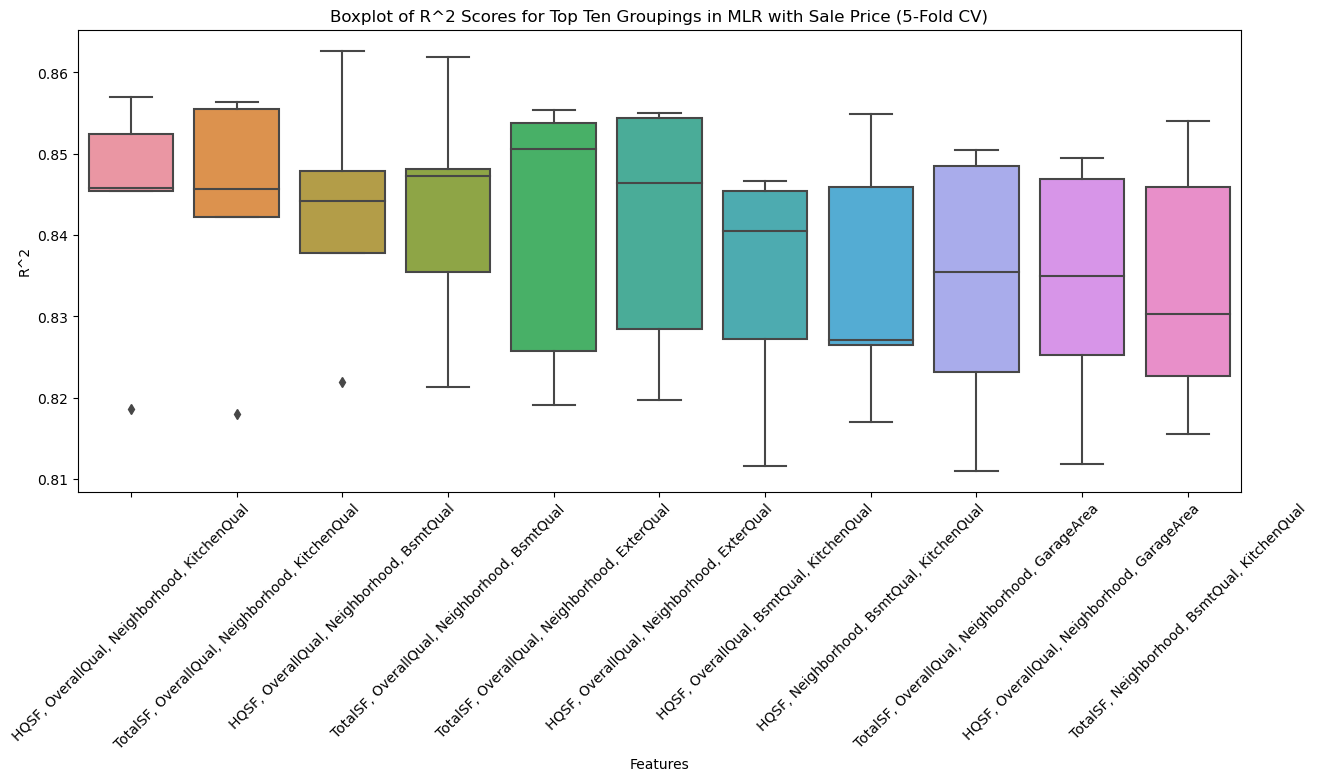

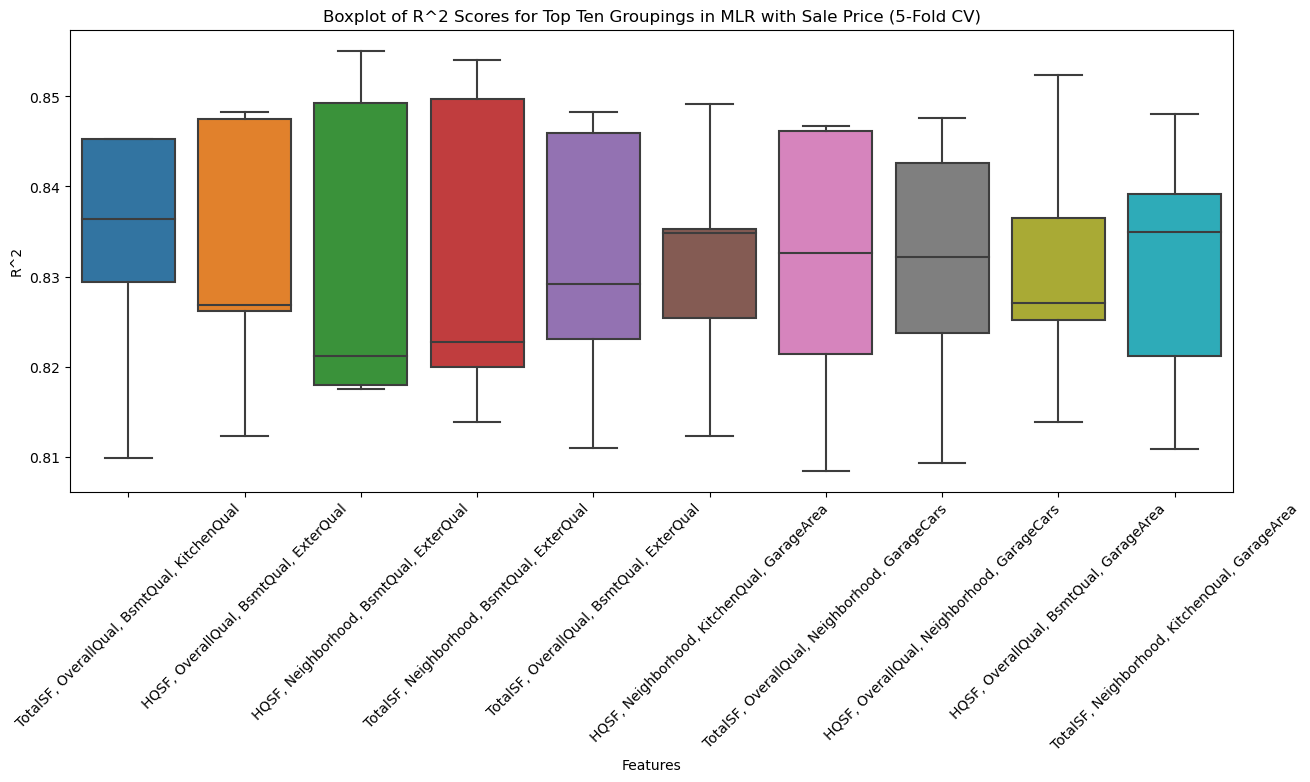

In [24]:
cvplot(mlr_4_CV_df)

In [25]:
#Trim top quads with 'OverallQual' inside
trimmed_list = []
for x in range(50):
    top_quad= mlr_4_CV_df.iloc[x, 0]
    if 'OverallQual' not in top_quad:
        trimmed_list.append(top_quad)

for subset in trimmed_list:
    print(subset)
    mlr_coefs(subset, ames)  

['HQSF', 'Neighborhood', 'BsmtQual', 'KitchenQual']
R2: 0.8426503402524808
 coefs: [49.549494940284596, 1664.1399389243743, -16094.659006365828, -12515.844209594148, 15186.03844946923, 6443.189434058728, 17959.32702885901, -21006.00994130852, 11556.861729896997, 20765.38867675953, 107099.79279039914, -27006.844307603944, -4627.355159392669, -27340.241376575654, -4059.2119638522845, -10635.373491252369, -9894.077542173569, -727.5255576684186, 57909.01046038554, 32355.88093297019, -25317.170043888087, -21892.122529125052, -7287.531703038112, -3246.9971733948146, 21162.331858770864, 51779.29338196237, 13729.408687114636, 26905.830691822688, -49998.859444645626, -38695.682769781735, -29195.31174253749, -45411.7188791197, -47024.204082478354, -68466.37668876455, -40162.14947429711, -104279.75406636973, -56799.69177029795]
 intercept: 140501.21456591296
['TotalSF', 'Neighborhood', 'BsmtQual', 'KitchenQual']
R2: 0.8396126871721684
 coefs: [49.491719796691555, 1640.7425530357432, -15960.320083

### Five Variables (Diminishing Returns)

In [26]:
quints = combinations(top14, 5)
top14_quints = [list(quint) for quint in quints]
mlr_5_CV_df = my_mlr(top14_quints, ames)
mlr_5_CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[HQSF, OverallQual, Neighborhood, BsmtQual, Ki...",0.8291,0.8582,0.8688,0.8567,0.8565,0.8539,0.0132
1,"[TotalSF, OverallQual, Neighborhood, BsmtQual,...",0.8285,0.8585,0.8680,0.8596,0.8534,0.8536,0.0134
2,"[HQSF, OverallQual, Neighborhood, KitchenQual,...",0.8268,0.8514,0.8631,0.8648,0.8538,0.8520,0.0136
3,"[TotalSF, OverallQual, Neighborhood, BsmtQual,...",0.8294,0.8629,0.8679,0.8565,0.8429,0.8519,0.0140
4,"[HQSF, OverallQual, Neighborhood, BsmtQual, Ex...",0.8300,0.8625,0.8687,0.8530,0.8453,0.8519,0.0136
...,...,...,...,...,...,...,...,...
1997,"[RoomsxBath, TotalBath, GarageCars, 1stFlrSF, ...",0.6925,0.6611,0.7089,0.6460,0.6550,0.6727,0.0239
1998,"[TotalBsmtSF, TotalBath, GarageCars, 1stFlrSF,...",0.6984,0.6517,0.7135,0.6429,0.6566,0.6726,0.0280
1999,"[HQSF, TotalSF, GrLivArea, TotalBsmtSF, 1stFlrSF]",0.6661,0.6836,0.7266,0.6564,0.6122,0.6690,0.0372
2000,"[GrLivArea, RoomsxBath, TotalBath, GarageCars,...",0.6574,0.6581,0.6881,0.6709,0.6545,0.6658,0.0125


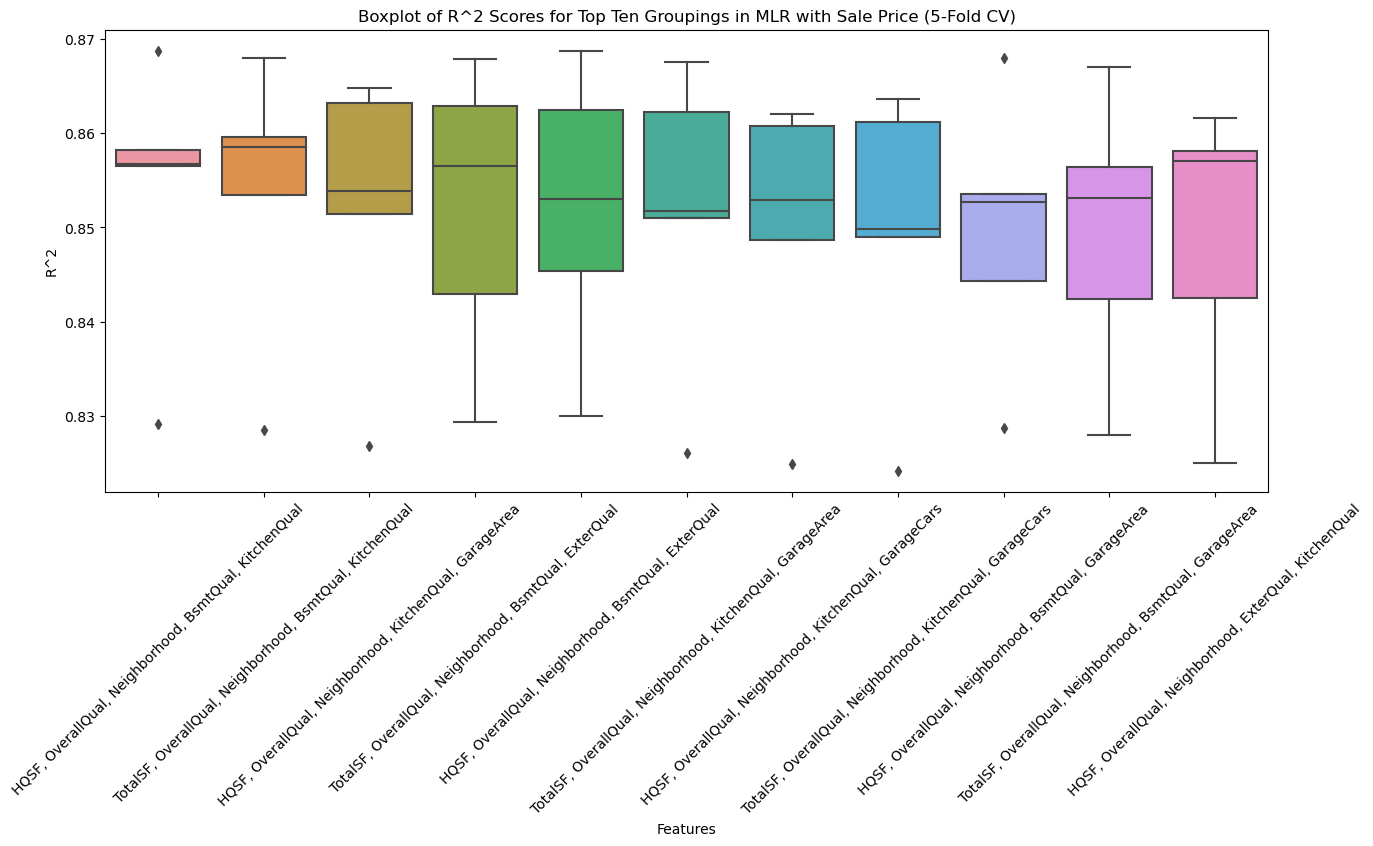

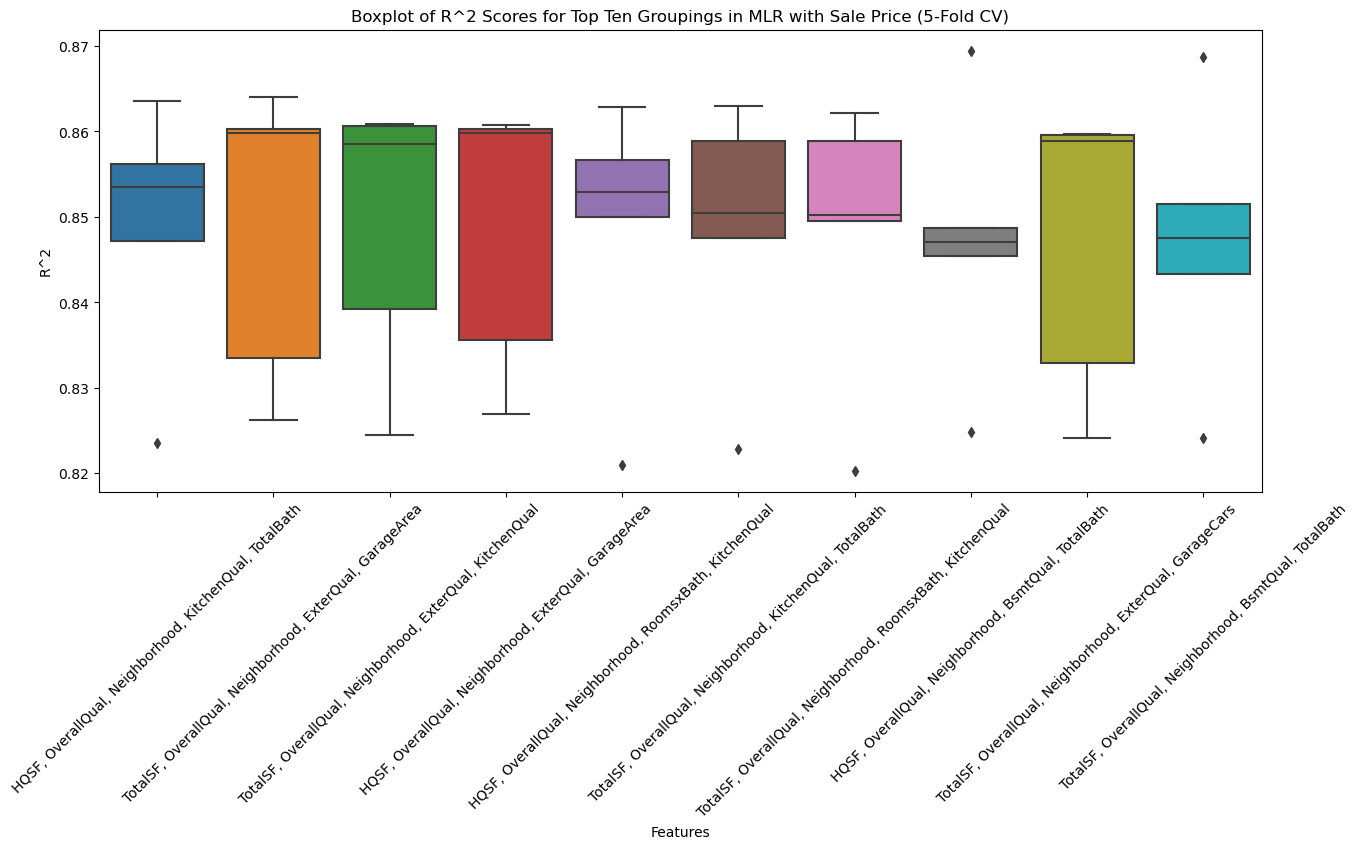

In [27]:
cvplot(mlr_5_CV_df)

In [28]:
#Trim top quads with 'OverallQual' inside
trimmed_list = []
for x in range(2000):
    top_quad= mlr_5_CV_df.iloc[x, 0]
    if 'OverallQual' not in top_quad:
        trimmed_list.append(top_quad)

for subset in trimmed_list:
    print(subset)
    mlr_coefs(subset, ames) 

['HQSF', 'Neighborhood', 'BsmtQual', 'KitchenQual', 'GarageArea']
R2: 0.8551120494642264
 coefs: [45.58720112939937, 39.44361155325123, -2076.6870803975785, -14150.533178093585, -10478.954028038987, 15097.028189627195, 3627.2262123132004, 20119.62022524886, -17977.786059865673, 12152.340629353255, 18848.88431242455, 113868.86451796816, -24199.51436285304, -8185.850269565773, -22747.87162590205, -6485.989635538285, -10884.490797246483, -10159.005082250396, -2612.58131339983, 53504.85539433438, 27846.383423239382, -23986.42561979669, -16729.909721358006, -7931.556400415941, -4743.859780959196, 16814.20859711233, 50918.42287818776, 11768.284065270409, 25465.59177070663, -46627.96432289828, -36598.305123718805, -29899.42824203145, -40440.412676019376, -44145.63552521428, -63934.33363230446, -40055.32521619604, -94958.88760507114, -55853.59349985441]
 intercept: 129651.99869903686
['TotalSF', 'Neighborhood', 'BsmtQual', 'KitchenQual', 'GarageArea']
R2: 0.8525109788522582
 coefs: [45.5492715

R2: 0.84426926123423
 coefs: [45.11499136570772, 12446.841400304445, 4568.323526365598, -9419.38501044301, -4699.729401609436, 22496.78570882662, 11358.946594338458, 27347.706036523683, -9096.997810329416, 15391.780904491745, 20651.511721628587, 123972.41170016352, -14709.04048344377, 352.76972426511406, -12080.91448023445, 5189.649108679982, -5463.79781555821, -3584.598715582954, 5101.6467107347635, 62166.4659645825, 38614.94488905119, -19238.105368087865, -10629.88375429733, -1706.7148734987475, 2045.8484251432324, 25771.610974197156, 60317.7037668564, 25379.177295603113, 27523.84088719033, -75132.61589710956, -53090.39512993666, -62681.63081792939, -54365.24342404272, -34682.632674949666, -85446.07553763552, -47918.155633908485]
 intercept: 134379.10076382186
['HQSF', 'Neighborhood', 'BsmtQual', 'ExterQual', 'GarageCars']
R2: 0.8448675475276427
 coefs: [46.4881036692321, 11305.855174111224, 3399.6786042300823, -6006.488461228445, -3245.4601885112415, 18681.929801562288, 11918.839305

R2: 0.8412175259372479
 coefs: [43.1435250562537, 1013.8939100022008, 3502.363631854537, -16466.285949659046, -9890.66644580801, 12141.928432068196, 6792.887938616964, 19610.281102395165, -20052.174759323123, 5976.684832670395, 22827.846901341367, 109063.8833450083, -23744.157302708732, -7456.7155584739385, -28406.46576837111, -3879.508204480978, -9476.438799900208, -13387.962117744399, 467.83322682188833, 54645.768762417494, 33063.98059897855, -21543.595777235892, -24840.053978527532, -7310.509138544067, -4977.986920941385, 21443.725062958056, 53579.86436946686, 12185.290820090016, 29134.700273331677, -47459.68814062641, -37006.302962722184, -31737.681128131506, -45701.435737804895, -44105.703678215395, -94950.53628081901, -60349.26224413593, -76854.58656211862]
 intercept: 161514.05734860356
['HQSF', 'Neighborhood', 'KitchenQual', 'TotalBath', 'GarageArea']
R2: 0.8409194819028438
 coefs: [42.316949222955664, 9543.431037183618, 43.2968665323447, -2977.16533041335, -22229.401004632193,

R2: 0.8429217441899751
 coefs: [51.05342165570701, -3.723769493006472, 360.8424117191458, -17789.438434452888, -13553.58163742174, 14604.026944298319, 5648.094504643977, 17266.712307458976, -21674.501560286484, 10097.817849591771, 20535.919552593383, 107057.99617372763, -28124.485170810593, -6392.678779946679, -28497.797702307143, -4532.258250430671, -11089.002210903376, -11056.176099235683, -1398.394857608194, 56425.95320462351, 31699.691572349933, -26433.739057347964, -23077.458708110687, -7729.809278408283, -4287.962056711352, 20161.471541506406, 51329.44362225806, 13342.328849306572, 26710.013188720906, -49903.08411384167, -38830.32380557296, -27550.382085102356, -45221.72806313536, -47082.64912472129, -68817.07347009584, -40458.1086962108, -105297.99313851167, -57044.02211736331]
 intercept: 142058.82725484832
['HQSF', 'Neighborhood', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.8342113184782831
 coefs: [42.89628989280666, 9007.390868626506, 11976.109186782982, 1054.60519315541

R2: 0.8407800999405591
 coefs: [15.830210707096455, 33.74650638368738, 1691.0385998860181, -15954.1672992004, -12684.657845920265, 15042.046358702115, 6460.141281363411, 17830.337696467373, -21069.638619405396, 11551.961387850439, 20770.094369313876, 107117.27409179244, -27542.670193111906, -4614.5529385613945, -27279.905555194735, -4000.955317257991, -10620.319860555366, -9865.554779222903, -679.7070137450353, 57898.55936215365, 32439.859731382865, -26046.327242640393, -23713.439412871252, -7299.713844160132, -3246.504404953925, 21134.496000444713, 51847.73507582617, 13768.197614945273, 26928.182518503338, -49517.26568327494, -38598.17200917735, -29114.26385120043, -44750.74394014983, -47040.81627306747, -67877.0590726457, -40043.495692219294, -104001.42028816967, -56679.15952326551]
 intercept: 140217.28614397574
['TotalSF', 'Neighborhood', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.8314154607899031
 coefs: [42.85079210588306, 9025.751038677896, 11932.141112460968, 1028.72141949

R2: 0.8366853380458636
 coefs: [46.40458072440127, 6616.158879133524, 26.42064442842806, -1974.7271342260608, -17848.389976133814, -13473.96710017209, 14221.591472469974, 5170.880693122969, 19921.96455053615, -17460.12338235517, 12085.072757698617, 19412.164218108184, 121933.35259142295, -25522.424614123505, -7362.951005153126, -19958.860298047537, -4009.553219462942, -14597.081467171613, -10534.162311845137, -5229.273142049798, 56548.28495724794, 40045.24269130266, -28638.933547772383, -19215.712778167675, -10719.448101725853, -3486.02817550039, 21271.824726583036, 60843.11739330376, 20911.78538005924, 23552.168117444606, -75812.2741211148, -53186.41896959381, -103855.91782233695, -69136.37961689226]
 intercept: 96990.48854783675
['HQSF', 'TotalSF', 'Neighborhood', 'BsmtQual', 'ExterQual']
R2: 0.8381356517989667
 coefs: [8.494645067599608, 41.78429169093408, 3549.4756516766533, -12827.02950263534, -10765.052754404624, 12832.292470011489, 8701.722168991439, 19791.255901873705, -19146.7

R2: 0.8365475860840577
 coefs: [54.33724878552861, -16.01358071995449, 43.629282783005415, -3781.973343897152, -20616.39269541665, -17049.405787023014, 7230.134974482915, 3235.296873113315, 15227.748397207683, -21300.709964343456, 6254.226125074532, 15102.94962234631, 111828.84306030144, -30934.627986766696, -12255.027073103225, -25809.626214246644, -5200.17332477887, -16824.701394727254, -13234.397140976702, -4819.296771681058, 49389.207799386575, 39659.59126821673, -31796.8921077103, -28461.836761902785, -12954.234414129984, -7087.652793937676, 18192.185311205496, 61796.7176321786, 19395.33322358088, 22381.910548403088, -106523.78808858701, -75815.06198624057, -93899.97130209337]
 intercept: 126169.34623001292
['Neighborhood', 'GrLivArea', 'ExterQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.8365475860840577
 coefs: [54.337248785528566, 38.32366806557437, 43.62928278300527, -3781.9733438968665, -20616.392695416765, -17049.40578702318, 7230.134974482744, 3235.2968731133174, 15227.748397207

R2: 0.8368439834694128
 coefs: [51.113470572544536, 36.26430743446443, -2493.013950508024, -20353.083584908378, -16306.193476577144, 12595.864212863476, 6907.71693611112, 9845.90744774568, -25240.542840565293, 6590.905857498114, 20792.241426946217, 105886.21243350496, -32208.424721138985, -10077.598053241489, -34289.8432467081, -5818.27990057625, -11952.592317479635, -11168.362222420565, -3688.421426611146, 58908.14668067831, 36543.2197835679, -30678.04848076279, -30822.375699366676, -10614.884090751277, -5278.370815823316, 21002.361043540397, 54225.697010636984, 14019.32861143372, 28060.460996168717, -60333.14406472513, -43126.55471715113, -85802.2633444244, -64730.81412890725, -53434.24901556802, -66220.47546372807, -41071.465978851855, -108275.6603998262, -57563.982102411326]
 intercept: 157451.84003333267
['TotalSF', 'Neighborhood', 'GrLivArea', 'ExterQual', 'GarageCars']
R2: 0.8302137992632863
 coefs: [38.960039555680034, 15.144193433786555, 12618.290688968282, 297.7075247257477, 

R2: 0.8358409747249518
 coefs: [45.548423504591824, 8714.783039417545, 41.606677429266725, -7488.21739615269, -20599.25936275772, -15338.061858767252, 1916.5158178245545, 491.61267793939516, 13965.793756192028, -25215.546836228314, 2904.798166777646, 20502.249773059157, 115517.80362965056, -30419.505404190357, -24418.192317534387, -32356.852195032945, -18126.572070579503, -18639.002677207696, -23919.623772546864, -12772.56491319149, 47763.28786319843, 37878.59223215207, -27601.918125608478, -30192.498167030477, -16967.839217282693, -10543.03345988731, 15742.459604060703, 58375.5286639672, 4548.992825372285, 26295.406476442924, -56285.500697969954, -46792.61525366536, -39086.565957830026, -46970.90702082208, -54205.94141062884]
 intercept: 77466.79226293656
['HQSF', 'Neighborhood', 'KitchenQual', 'TotalBsmtSF', 'TotalBath']
R2: 0.8291103575052888
 coefs: [51.246079096170035, -10.356301042220288, 9215.50179105704, -1694.1781248692153, -28709.95572075847, -19171.57479038958, 6973.20283385

R2: 0.8293152860206063
 coefs: [39.12462623347146, 13.876168307071225, 9831.809133671597, 1711.605330584029, -22877.8118645125, -14785.210887568977, 6640.650349362662, 5026.191172739236, 15037.807441740555, -23412.352701384232, 2125.7145381863406, 18832.129160984434, 105090.83869507766, -28634.49236302087, -13422.906172054956, -31356.02149232004, -3677.8416930379954, -14527.741563571872, -15946.627152192554, -4561.735729897451, 52373.701856766325, 44584.12552685464, -28099.64010749204, -32780.24732012169, -11406.454050700544, -8236.097217297562, 20535.53975176185, 61818.43424606639, 19150.617858534362, 22041.162365972446, -112747.31898995758, -78192.36092993674, -96241.92620055052]
 intercept: 127475.7462178403
['HQSF', 'Neighborhood', 'BsmtQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.8406745158234972
 coefs: [55.45668217921212, -15.120374470992125, 42.30265725763286, -12884.543354668429, -24122.338876374946, -20835.855618582525, 449.96616262124286, -190.46247712160155, 9141.615709513666,

R2: 0.8253101415423769
 coefs: [46.78399598001991, 969.6802230381863, -4.634478810780058, -1046.9188211115777, -29281.586553784695, -20831.733490716077, 8216.326499521118, 2405.3969406588676, 11694.79602732476, -28004.81552257238, 3012.8791993376803, 23327.079247578302, 108807.52446154787, -35673.282074648036, -10165.79398163848, -33484.603739425555, -7126.232569790971, -19532.830741199945, -16922.47813681324, -10793.568485043437, 53159.09959632373, 41591.60496671307, -36181.78136092645, -34976.17245629006, -15996.579555677154, -9758.84767952568, 20500.911933606167, 58846.5112200267, 18196.973839526403, 22013.786802624043, -82210.68000387096, -54314.90464600304, -113264.8488191338, -70781.05121970487]
 intercept: 117516.77190311863
['HQSF', 'Neighborhood', 'GrLivArea', 'RoomsxBath', 'KitchenQual']
R2: 0.8252306745527238
 coefs: [41.651982823612535, 5.881895719908002, 938.549796636527, -1347.7578646587556, -29587.924986771144, -21221.998954600625, 7950.2878030304855, 2297.1013923340442,

R2: 0.8226506012253194
 coefs: [45.14059187203729, 391.7356339087628, 8250.444759523823, 4882.607088099507, -19653.106567908242, -11866.639805162507, 9201.636630535122, 6379.2542327937945, 18842.48877896187, -20663.04969166951, 5614.416310475286, 20259.709575771234, 109580.90178932693, -25757.960982875924, -8745.814597352035, -28390.427976907205, -2490.3961791885595, -13226.572499122742, -14143.141213030662, -2399.38361184901, 56464.06095909598, 45251.468671149836, -25301.781195624735, -30727.27365735588, -10257.242785984125, -5600.332857917375, 22804.441100934077, 62668.47142305639, 19662.171199530498, 23677.07654109366, -112375.22295553653, -76820.72642941194, -95040.74269652888]
 intercept: 127239.59582073803
['TotalSF', 'Neighborhood', 'ExterQual', 'RoomsxBath', '1stFlrSF']
R2: 0.8212509843541063
 coefs: [38.326824097947316, 1326.7841862372943, 12.245589615453518, 9019.460675022381, -16042.18334492917, -11085.434738090968, 10848.064460702843, 8666.879067930508, 19546.6830680222, -2

R2: 0.8230155144164282
 coefs: [47.91916061759877, 1014.0795774132127, 41.10243564965026, 2652.1310616896903, -23197.613999630772, -16494.348137633588, 7884.098900367129, 5699.132936872139, 15289.330913431051, -23648.935885906114, 3338.506917668809, 21353.4801938288, 108376.11477505052, -31022.438353043643, -8001.456265840429, -30314.62615425081, -2953.519064149743, -15567.055015721473, -14682.134424361202, -3859.1628334039738, 53619.33470784159, 44556.48597652682, -30605.369729265185, -34741.86413934702, -12274.550868335262, -7009.238029938032, 22971.737097583962, 62885.17102515272, 20063.037899815903, 25150.474468095472, -113446.78393559599, -77042.08864224787, -96197.06825103503]
 intercept: 139374.7033246999
['HQSF', 'TotalSF', 'Neighborhood', 'BsmtQual', 'GarageArea']
R2: 0.8344644040064996
 coefs: [14.949040120615312, 34.67344183450279, 42.80321141761218, -8849.061999412428, -18824.30233892657, -17542.50120226067, 2966.275018648473, 1792.8225412192219, 13454.05735922402, -24788.5

R2: 0.8251374885380018
 coefs: [22.30435330297228, 35.63107052864267, -15.493595619366904, -3546.344648005426, -29994.850561397605, -24749.056957176334, 6949.307699295804, 2817.800088587803, 8385.530580104265, -29572.266435872072, 4564.877128973145, 19138.981997403906, 105610.40910396761, -39717.74932972562, -10877.609671505405, -34517.43195384593, -6644.13867628304, -21116.48206540663, -15493.08863092676, -10097.19040602195, 53251.88925769337, 42194.2659571827, -40526.755537153935, -37769.295897521835, -16661.777838159163, -8572.664651275274, 20277.88407507453, 59097.27963124135, 20055.282698265957, 20552.7355842599, -82094.43373847083, -54836.023992203816, -115933.79777975599, -71664.61323226737]
 intercept: 116329.11167232443
['HQSF', 'Neighborhood', 'GrLivArea', 'KitchenQual', 'TotalBsmtSF']
R2: 0.8251374885380021
 coefs: [22.304353302974814, 35.63107052864015, 20.13747490927324, -3546.3446480054386, -29994.85056139759, -24749.056957176326, 6949.30769929608, 2817.8000885877955, 838

R2: 0.8405334814702572
 coefs: [47.125505087951026, 8754.761320513619, 46.67116761314355, -62370.68418018011, -40489.39786549667, -37367.22231825558, -55084.46197947922, -56424.31566010222, -71980.13787372503, -43083.236680306465, -79179.9342673331, -63567.800422612134]
 intercept: 115485.28874844217
['HQSF', 'TotalSF', 'Neighborhood', 'BsmtQual', 'GarageCars']
R2: 0.8273132709943677
 coefs: [14.489624063581036, 35.596087145781425, 11697.299599357433, -4824.160500409555, -13613.649183312527, -12248.977895204145, 8572.009431637458, 8249.180589753045, 18347.98924816129, -18782.554275272127, 8042.196568956955, 23253.543324416718, 124783.88673147737, -25261.170224855763, -16208.751650078411, -24612.450965446544, -10578.172354277283, -13161.420551082441, -18243.914536785614, -5265.947124583463, 55880.34843250666, 44046.90229515844, -23964.385952004195, -22634.80689214263, -10819.971931236756, -2604.753601293015, 24940.471404115327, 63749.97658386175, 11568.517973502749, 33732.554779725986, 

R2: 0.8252124683299893
 coefs: [54.23364822837618, -10.752681065126417, 8217.364888415657, -6984.352869983159, -26673.38584748361, -20911.712262571116, -759.7196623260091, 1933.5769088258635, 7938.199211475037, -31032.560155412837, -1750.4472867476632, 22187.594535489392, 108304.16495436165, -37304.126537380784, -25302.1929494083, -40878.10595435308, -17147.168260452923, -19986.052995160797, -26399.297020083904, -13251.02106069778, 48808.47441901557, 41970.505205450034, -32813.94827272707, -40679.89416362921, -18181.84867401369, -11516.216234450232, 18412.68561258709, 58687.53061182425, 5638.107658303353, 27312.299310184582, -61974.6202171048, -50117.43922316434, -46258.54941185751, -55278.354629947484, -58766.064630933586]
 intercept: 92894.79497722923
['Neighborhood', 'GrLivArea', 'BsmtQual', 'TotalBsmtSF', 'TotalBath']
R2: 0.8252124683299893
 coefs: [54.23364822837611, 43.48096716324983, 8217.364888415656, -6984.352869983235, -26673.385847483733, -20911.712262571113, -759.7196623260

R2: 0.8395945324686388
 coefs: [43.4437993166006, 12.591583191536905, 48.61515397426153, -71288.94725535448, -42948.71437749107, -49686.002158232164, -68061.7100940648, -63099.04841160748, -72190.2640792715, -42471.405898327255, -85813.59775231413, -63756.85223400234]
 intercept: 128991.49849533997
['TotalSF', 'BsmtQual', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.8309620700746401
 coefs: [47.562011235555545, 8222.14681815554, 13146.873946647383, -61563.57648284333, -40467.798697299106, -36026.04203467684, -57101.48107246327, -55031.83755183085, -72018.38635745618, -43608.18719461512, -82647.54326605519, -64341.28577416699]
 intercept: 114149.12029583732
['HQSF', 'Neighborhood', 'GrLivArea', 'BsmtQual', 'RoomsxBath']
R2: 0.8252909355882244
 coefs: [43.42302953635951, 8.685064012847718, 761.6958072408761, -7751.425988262413, -27204.85729635283, -22053.20329694352, -76.86396352432286, 2024.1978967100117, 7731.890294473415, -31156.689511274613, -1967.3474902909606, 23890.697333839245

R2: 0.8248120888968888
 coefs: [35.03509312255239, 22.838895491310822, 11.924448100987483, -7479.867395933554, -23995.470780866697, -22672.661974912815, -98.36229254590044, 4099.3238957809735, 5975.286255236007, -30945.619556360693, 1736.1723568825423, 21114.523364062978, 109756.1476063714, -39338.707678976505, -20542.106209551195, -40295.732219949656, -15461.74487204407, -20231.467548037403, -23006.907344373627, -11310.038689295585, 51988.99975715245, 43217.37395504265, -34822.22054611804, -39537.12466008084, -18081.615032572317, -8167.393242215118, 21708.469026264178, 60108.51253520388, 8166.9602052154105, 29048.74566347512, -67796.55987853243, -51705.664445952694, -62194.75755705052, -64214.498918731646, -63316.59109848767]
 intercept: 103269.5947143744
['Neighborhood', 'GrLivArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF']
R2: 0.8248120888968891
 coefs: [57.87398861386338, 35.03509312255267, 11.924448100987016, -7479.867395933094, -23995.470780866704, -22672.66197491279, -98.362292545

R2: 0.8253193564425845
 coefs: [20.58081940560048, 39.82545154439142, -16.462943605707967, -9688.82213341135, -27003.29229853574, -24324.66634984016, -782.7459001500683, 2479.1576863325267, 5728.2450189929, -31752.311033521833, -533.6023225988907, 20585.571942685456, 109841.92536724839, -40867.72839708771, -23461.103991497188, -41891.46954175719, -16223.81548111857, -20951.791902037017, -25199.735581828794, -12149.043188973728, 49226.01266429233, 41669.803357608085, -36122.36865676559, -40232.065204774124, -18588.01767422559, -9940.349759302533, 19787.125229439487, 59168.93513114552, 7430.041828945492, 28769.578114795753, -66979.46201466651, -51782.703633225734, -52506.83210718253, -62065.508107853544, -62983.57161293597]
 intercept: 104823.2337438347
['HQSF', 'Neighborhood', 'GrLivArea', 'BsmtQual', 'TotalBsmtSF']
R2: 0.8253193564425848
 coefs: [20.58081940560574, 39.825451544386155, 23.362507938678156, -9688.822133411444, -27003.29229853572, -24324.666349840118, -782.745900150172, 24

R2: 0.8149969335162697
 coefs: [43.845907084978265, 11992.69721483836, 39.925978507411145, 1742.429272000092, -25219.140455384804, -19278.183821785515, 6417.133760694355, 5350.702816761777, 9227.628916232019, -33088.75223194275, 4211.582342420765, 22057.422918377597, 83610.54288723579, -34228.03304801601, -11684.103801400757, -33914.52138004499, -8713.536377514036, -19055.758215149894, -14091.78057569274, -10510.679301286968, 59532.61947593412, 48209.99653380722, -34199.17199407714, -37387.033037186935, -16734.04066184931, -9933.618028325283, 21916.551021221505, 61935.931645953104, 19380.11709866686, 20338.659646357843, -82704.36842221001, -55411.7652521147, -107182.57590337306, -71990.27467806933]
 intercept: 107662.67163053516
['HQSF', 'ExterQual', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.8202233367735512
 coefs: [45.139597668094126, 11265.101662767185, 15091.852219123608, -95913.41316294632, -58253.904435938486, -79685.366204469, -58804.165358960876, -37984.6217011502, -58429

R2: 0.8240665292489687
 coefs: [49.817414193748476, 10639.353765053434, 3.898768695889885, -62875.735089592774, -41540.21094249874, -35739.06516039145, -60940.844873361224, -56002.20066900255, -113192.65748672659, -63608.01737163899, -91156.24621246516]
 intercept: 149748.19658361463
['TotalSF', 'ExterQual', 'RoomsxBath', 'KitchenQual', 'GarageArea']
R2: 0.8178135256656622
 coefs: [42.18248175453461, 1233.2416950349552, 53.549480383255286, -101919.30075602344, -57100.503210036404, -81789.59889257565, -59879.36639076852, -36812.061172703536, -55485.52074677801, -51987.44833395696]
 intercept: 143341.9503186284
['HQSF', 'BsmtQual', 'ExterQual', 'RoomsxBath', 'TotalBath']
R2: 0.8246677396439581
 coefs: [51.36683061229606, 59.68455881616683, 9925.041084658224, -63358.93643613623, -41884.41639754744, -34425.07669541762, -61631.953468263535, -56350.59586245574, -113695.78723607214, -63954.3995723117, -91451.06538608989]
 intercept: 151589.1579653368
['Neighborhood', 'BsmtQual', 'RoomsxBath',

R2: 0.8234790359767482
 coefs: [54.18723037700473, 48.73535108340681, 9030.515010310484, -71144.50065936301, -44464.40658694317, -43497.08584896584, -67603.95498491089, -63568.65414513131, -79701.53342840463, -43719.27612045029, -92871.77171161021, -66105.3285817371]
 intercept: 131386.57890516665
['TotalSF', 'BsmtQual', 'RoomsxBath', 'KitchenQual', 'TotalBath']
R2: 0.8224411296899405
 coefs: [52.1912060893424, -89.48421944294569, 10135.938121151195, -69339.13465933496, -43663.24361011403, -38833.49786236546, -64639.585788894256, -62410.18805624764, -79339.99531042347, -43376.38531259551, -91359.9941493759, -65760.48709440623]
 intercept: 128282.9113038368
['Neighborhood', 'RoomsxBath', 'KitchenQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.8055894904529007
 coefs: [2763.674506668345, 43.07444056576321, 56.61053459759555, -169.81544543710794, -22248.10794269541, -7444.955246654922, 19940.971464714756, 1137.078601005479, 31681.612888799937, -16483.605411279328, 10494.214827378843, 25612.5380

R2: 0.8057086047505426
 coefs: [51.05808711935736, -7.203205419524423, 9965.107605979905, 48.2469097576986, -9904.091526519367, -28278.4629547378, -21848.938807140472, -4607.109870460553, -1952.1976686086043, 9286.93713450429, -28886.31712132955, -1166.5388076076829, 19131.756594451523, 117119.71500995729, -36176.45294579544, -27982.739672163207, -34834.678998619296, -18888.32064093204, -26312.97862218639, -27559.101622249374, -20583.67225131555, 44983.77560284589, 56693.03456960864, -35454.98012869497, -36591.972799735784, -23542.699120476478, -14262.562331196825, 17394.888184069998, 73564.95640959709, 13686.444616396835, 21801.61677795018]
 intercept: 21693.215866040468
['TotalSF', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars']
R2: 0.811287616842471
 coefs: [43.5856184309108, 11.509948141174618, 17144.02376515421, -101712.11272986663, -58920.63068477468, -82735.78524191989, -59582.142739535586, -36924.28119882305, -61849.732119361455, -52747.03273831988]
 intercept: 137474.02

R2: 0.8201946796607749
 coefs: [59.59097829221667, -22.586397255082552, 13.314282342065063, -75135.28886027852, -44634.66287848372, -60376.86324324147, -79670.0931498942, -65211.02314804214, -116301.06220148102, -63470.668212668636, -92238.7075920373]
 intercept: 168190.35021265096
['GrLivArea', 'BsmtQual', 'ExterQual', 'TotalBsmtSF', '1stFlrSF']
R2: 0.8201946796607749
 coefs: [59.59097829221677, 37.004581037138564, 13.314282342060125, -75135.28886027858, -44634.66287848392, -60376.86324324161, -79670.09314989398, -65211.02314804236, -116301.06220148099, -63470.66821266864, -92238.70759203723]
 intercept: 168190.35021265195
['TotalSF', 'GrLivArea', 'BsmtQual', 'ExterQual', '1stFlrSF']
R2: 0.8201946796607748
 coefs: [37.00458103713825, 22.586397255078445, 13.314282342060391, -75135.28886027847, -44634.66287848394, -60376.86324324162, -79670.09314989395, -65211.02314804228, -116301.06220148099, -63470.66821266863, -92238.70759203722]
 intercept: 168190.35021265206
['Neighborhood', 'GrLiv

R2: 0.823736366613615
 coefs: [50.73689199679106, 10.436077495269444, -1.2712898169590368, -78851.07898135723, -46217.29294028202, -50928.81008592314, -78582.47255292739, -69273.27143036036, -80233.31834839904, -42642.6048221873, -98968.42850324947, -66025.93370360968]
 intercept: 143728.20688334518
['HQSF', 'TotalSF', 'GrLivArea', 'BsmtQual', 'KitchenQual']
R2: 0.823736366613614
 coefs: [50.736891996776706, -1.271289816944563, 11.707367312228255, -78851.07898135742, -46217.292940282154, -50928.81008592321, -78582.47255292711, -69273.27143036047, -80233.31834839901, -42642.60482218736, -98968.42850324945, -66025.9337036097]
 intercept: 143728.20688334526
['HQSF', 'TotalSF', 'BsmtQual', 'KitchenQual', 'TotalBsmtSF']
R2: 0.8237363666136142
 coefs: [50.73689199677641, 10.43607749528405, -11.707367312228168, -78851.07898135719, -46217.29294028205, -50928.81008592303, -78582.47255292712, -69273.27143036037, -80233.31834839901, -42642.60482218735, -98968.42850324938, -66025.93370360973]
 int

R2: 0.7985815975068946
 coefs: [45.519521965706396, 1030.361727380659, 5724.79170988163, 32.814598697583875, -8233.445906040157, -26115.103786774234, -21089.12321075097, -1103.7852907197775, 1236.6786296954242, 11809.62475404907, -26269.800915467906, 462.289748630485, 23625.822569661217, 125014.4767150692, -35241.801625487504, -21987.823280932833, -30492.686237354083, -16175.668489063522, -24845.98774497293, -25563.808284682582, -18134.094871815003, 48388.863507199014, 58528.4342754227, -35629.2067556763, -36252.85584605679, -22074.85805541486, -11141.41054947315, 22397.864666884896, 76330.94878779168, 16249.85328349653, 27346.833406971702]
 intercept: 30013.384666153346
['Neighborhood', 'ExterQual', 'RoomsxBath', 'GarageCars', '1stFlrSF']
R2: 0.795444692727337
 coefs: [2656.5800352632064, 13814.752528909823, 50.09362265013078, 17835.560609023833, 1878.0923186534656, 7791.807024337096, 27223.37371809969, 18705.597359699354, 39269.752422944875, -7422.51357931056, 19312.13222160509, 3104

R2: 0.7964424579163077
 coefs: [3016.788491091477, 44.30248294898641, 10495.245756610928, -19526.86160397156, -2597.8457390696867, 27265.28854887982, 8113.709817748488, 35714.09400748641, -13723.69773852014, 12304.098143780571, 27335.791370315244, 117166.85318163794, -15124.284074657335, 3921.318783037959, -24381.17165804216, 1788.452780503138, -6553.850931852613, -9919.300258605725, 6773.571364054942, 76374.34349065769, 42345.91281331709, -14741.723799316254, -15681.922573586864, -6551.3725932469415, -937.9403817608611, 26555.055820612746, 62155.70427601904, 22624.373995866576, 33356.58349518534, -91145.57324919269, -55142.65625160407, -68885.73283886368, -66349.13277269897, -38811.77546165521, -98132.60619384395, -53233.54965283216]
 intercept: 189577.54331215343
['HQSF', 'Neighborhood', 'RoomsxBath', 'TotalBath', 'GarageCars']
R2: 0.7952690621077092
 coefs: [47.60736368961261, 193.69054803523522, 8605.85672806371, 13523.782754592705, -3805.18989627571, -19367.378203322856, -13245.55

R2: 0.8020929382325559
 coefs: [56.22841332585063, 40.732722715733274, 8.866152710745366, 47.9582309341116, -10359.062102417947, -27913.99834304982, -27656.647857355245, -5489.665301824718, 92.86661455910587, 5234.833661867978, -31975.21639785298, 2959.504855623484, 17880.35013609658, 113969.88076058694, -42651.30813573336, -21746.163709331806, -34430.32990928283, -18472.78026291817, -29998.254293645838, -24077.47807064395, -19771.14669009059, 47908.089866901435, 57809.130707256525, -42198.707298253255, -40711.29409249548, -26010.21400491411, -11008.420967177, 21143.497815246363, 75049.36870259103, 16484.255135743624, 22949.495418122853]
 intercept: 30065.58282841774
['TotalSF', 'Neighborhood', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
R2: 0.8020929382325555
 coefs: [56.22841332585069, -15.495690610116743, 8.866152710744995, 47.95823093411011, -10359.06210241772, -27913.99834304985, -27656.64785735519, -5489.665301824693, 92.86661455909169, 5234.8336618680105, -31975.21639785302, 2959.5

R2: 0.8093698298706746
 coefs: [50.60558199110492, -7.789302711206119, 12459.117060575225, 55.61131007542508, -136341.89911614588, -86277.13216408229, -119468.65914881845]
 intercept: 110362.42594310155
['TotalSF', 'Neighborhood', 'GrLivArea', 'RoomsxBath', 'GarageCars']
R2: 0.7920135010338879
 coefs: [46.09945487041663, 0.9026786798504531, 968.5464874178078, 13593.987266569096, -5390.653086221712, -22362.05517918321, -17520.19274751735, 2698.590939884126, 5907.7018935873475, 14962.798966588367, -22270.990902819332, 1539.7399306317675, 26495.302080663092, 129382.1288094834, -30475.760254557306, -19154.84004334201, -26296.463400881526, -11627.524014222417, -20413.500068022626, -23343.77051525633, -14196.041549859323, 52683.05797906353, 63293.92794357796, -31884.468680227106, -33099.95787376553, -17677.637506045292, -7630.803942233974, 27336.95132566824, 79543.50760956436, 19765.249785972963, 31315.53374227366]
 intercept: 25774.56156276501
['TotalSF', 'Neighborhood', 'RoomsxBath', 'Tota

R2: 0.8058233687638183
 coefs: [49.99773077818035, 42.95255012357407, 12694.677828447242, 55.82707913708357, -137538.53062287165, -86404.95311614715, -119777.21745268961]
 intercept: 110538.54709051627
['TotalSF', 'Neighborhood', 'GarageCars', '1stFlrSF', 'GarageArea']
R2: 0.7950817398113075
 coefs: [50.865622309119225, 7815.025678621599, 3.519988841028913, 28.1064230288227, -6634.171550653494, -20724.223283569816, -20214.31068305876, 1407.1053106694735, 4821.62041458566, 13595.19056706313, -23375.884049243537, 7807.583399159849, 20083.67609077438, 126327.59403316717, -33383.58742594269, -16834.31683078641, -26238.5486394836, -13272.344205597134, -23842.2580867699, -20508.076779535473, -13660.53353311423, 54814.56996704986, 61003.4031057879, -34174.34224609458, -30985.2783476866, -20048.565023511026, -5205.755193888202, 26088.69090061383, 78215.2737117286, 19919.102144559165, 27603.100679007963]
 intercept: 23195.200254963187
['GrLivArea', 'BsmtQual', 'ExterQual', 'KitchenQual', 'Garag

R2: 0.8109307084318872
 coefs: [45.428991878651374, 3.8123621074101663, 13130.582649690183, 59.236427902604476, -96078.01150535808, -61938.879583753034, -88340.8968691169, -87737.29316249717]
 intercept: 73910.47318878354
['TotalSF', 'ExterQual', 'RoomsxBath', 'GarageCars', 'GarageArea']
R2: 0.7984408043533578
 coefs: [44.63817884465728, 1170.9055168067073, 10163.840289596805, 28.902634759806233, -137310.85638235218, -84700.38774410222, -119461.28950251132]
 intercept: 121800.2245526901
['Neighborhood', 'GrLivArea', 'ExterQual', 'RoomsxBath', 'TotalBath']
R2: 0.8052229473625828
 coefs: [64.4017942916357, -840.2240315973004, 17692.471660966326, -16158.194956241527, -44580.67185306442, -29194.729982632172, 1063.2971959867548, -1051.0390150092046, 4652.76750962979, -36920.82723059496, -15078.588666152069, 11744.315686547307, 81549.15951843881, -44427.09277454925, -38150.13741326292, -50900.84040417239, -9519.661318233077, -19453.865788652958, -27522.332240443626, -8534.146924492987, 48481

R2: 0.8058067901863362
 coefs: [42.725161167672894, 1097.4414786179912, 46.319139170520884, -86102.56292379038, -48809.527451873066, -104684.34253680077, -91494.80303207482, -73251.9574905409, -80497.87195243953, -44066.17325133305, -99194.37676171381, -68741.19854748946]
 intercept: 159749.95773816598
['TotalSF', 'RoomsxBath', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.8000380459567042
 coefs: [48.87167720583971, -392.0509187907296, 14875.552816381094, 17691.157885215238, -93653.84372605395, -62271.41735181239, -91588.23115322925, -87070.45594735515]
 intercept: 69120.68381778675
['HQSF', 'GrLivArea', 'ExterQual', 'RoomsxBath', 'GarageCars']
R2: 0.7979207864828073
 coefs: [45.476177858697916, 0.9141848248647406, 1090.5540169783617, 16926.900435976626, -136986.14239465506, -85503.78225701454, -119977.14280351836]
 intercept: 121984.82948700331
['GrLivArea', 'BsmtQual', 'ExterQual', 'TotalBath', 'GarageArea']
R2: 0.8161682644445056
 coefs: [55.74824658510756, 10111.484112633, 63.69

R2: 0.785318107526922
 coefs: [58.01965694943526, -222.34744899297624, -10.602294872853836, 11960.100084913733, -6667.453255528829, -32830.62731147257, -26732.310249873986, -6749.085913603481, 840.9689910064395, 4593.6716213344, -34241.34680679588, -3249.0812986182286, 20638.037068407764, 109186.49658326244, -42681.39167020557, -26233.550244927173, -42257.92137060739, -17007.502005096918, -27717.012336064392, -28816.281244471447, -19808.758077422237, 49617.05698992523, 63454.277597137334, -40341.22129921407, -48806.913572453, -24529.829884972703, -13289.978674647562, 22005.59450400234, 75329.3273315314, 16149.888324877975, 22449.665537980138]
 intercept: 29653.75786355458
['Neighborhood', 'GrLivArea', 'RoomsxBath', 'TotalBsmtSF', 'TotalBath']
R2: 0.7853181075269212
 coefs: [58.01965694943422, -222.34744899297232, 47.41736207658219, 11960.100084913707, -6667.453255529121, -32830.6273114726, -26732.310249874106, -6749.0859136036115, 840.9689910063352, 4593.6716213343525, -34241.346806795

R2: 0.7952321283316538
 coefs: [20994.32721428266, 52.85915658434678, 56.920867458411074, 6541.784045935199, -9714.324503714426, -1576.680397044628, 20994.390098918328, 8245.747911129147, 32851.72811594615, -18207.249370556376, 21511.649261269573, 18652.448813135212, 95975.63892509892, -13615.566098389101, -4625.5340503806665, -19255.40186859581, -8108.40456801267, -11305.184459216109, -7275.963294517213, 834.0329709422432, 82927.30065429848, 50255.382882128, -12444.232796534561, -7815.231615935692, -11987.75010724015, 258.91677330408663, 24316.99156085787, 67636.3873354663, 21382.13317864479, 25632.252577652813, -84294.85736927767, -57772.45247377084, -97171.23304976986, -75327.95994659932]
 intercept: 103616.70746326302
['HQSF', 'BsmtQual', 'TotalBsmtSF', 'TotalBath', 'GarageCars']
R2: 0.8159946244239653
 coefs: [55.22433752153106, -4.441275991429883, 8107.526113984844, 15017.76616762903, -86362.00578180749, -58724.23152461156, -60220.00213624042, -82421.82686850858, -80262.636276376

R2: 0.8044716790067628
 coefs: [43.86148476001954, 1301.9493028871184, 3.5922850635727173, 61.63802752761194, -97659.89346567857, -60269.556893254514, -90276.12816986458, -88699.72169843958]
 intercept: 88581.63473419161
['GrLivArea', 'BsmtQual', 'ExterQual', 'RoomsxBath', 'GarageArea']
R2: 0.8114548215693357
 coefs: [53.45183865897602, 839.6047331796574, 65.23094775751679, -80727.89673556332, -51167.220393828175, -93730.09199387231, -91575.90647228883, -66577.56653050472, -127009.17854418173, -75827.97287116229, -105856.67321156402]
 intercept: 205343.54245197325
['HQSF', 'RoomsxBath', 'KitchenQual', 'TotalBsmtSF', 'GarageCars']
R2: 0.7974576880792323
 coefs: [44.79034563142351, 1111.554938582434, 3.5603812429455957, 18452.639171075352, -95967.4971899996, -60953.67377600591, -94809.9734091215, -88360.85569090761]
 intercept: 85716.3059215018
['HQSF', 'ExterQual', 'GarageCars', '1stFlrSF', 'GarageArea']
R2: 0.796043256877819
 coefs: [52.27381046146688, 13384.043208995397, 0.88007620104

R2: 0.7814422157204746
 coefs: [33.62452606879118, 18.1535257461313, 1087.1835003116503, 15.47100032632544, -6609.495239319621, -34773.29274664367, -29767.787726675284, -6216.383993040036, 1017.6917711593618, 3891.060879435206, -35796.68200909227, -3100.0826300548392, 24094.88504011267, 113040.29661770856, -46258.32136313274, -21313.546996399946, -42442.77235385892, -17449.789510576153, -30099.706508847084, -28818.69927621821, -20477.631801306452, 50309.98005409905, 62702.28383131253, -43652.18022665859, -50363.68134028272, -26785.54929712687, -12751.354772760007, 24620.4774017732, 76072.44938921084, 16512.18228201603, 25766.226566061177]
 intercept: 45446.543217883416
['TotalSF', 'GrLivArea', 'BsmtQual', 'GarageCars', 'GarageArea']
R2: 0.8166081532994165
 coefs: [50.11430061923602, 9.669059726107136, 7121.555213217909, 37.073461645465756, -92842.85896501625, -59243.177678878106, -68070.27513972601, -89527.23262323382, -86139.58379430701]
 intercept: 75522.91636643725
['TotalSF', 'Bsmt

R2: 0.7976043012665376
 coefs: [2986.3375119817915, 66.526630154933, -15552.112144385343, -34403.388745157965, -10300.18554576116, 21549.786853891044, -1370.325946125023, 30604.545965385358, -17670.29135476523, -4387.927276175275, 19710.533011062835, 123929.58032535367, -24360.29742050443, -28851.788570354864, -38695.33660615856, -11426.829855409896, -8773.460017475672, -25323.329807256683, 2278.9126237200044, 64651.126451601725, 34195.949035788246, -19418.741835232322, -18798.190924599672, -13543.254374385328, -12045.120594874765, 10837.105986839597, 61436.88351823718, 11088.027742307166, 41342.03722628481, -58623.37716558432, -42394.2124356679, -74324.3215062211, -61361.9761307789, -48722.382799084095, -115077.4535967603, -73391.20257577748, -95615.23668396937]
 intercept: 234333.129795296
['Neighborhood', 'ExterQual', 'KitchenQual', 'TotalBath', '1stFlrSF']
R2: 0.7896343141915869
 coefs: [22441.99121392158, 57.97814051068707, 20100.3118479026, -2900.825368037575, 6030.517400937726, 

R2: 0.8138633550395133
 coefs: [57.28659556866, 7563.124136962273, -3.0379551283540422, 35.821556261786554, -90531.1054450608, -57977.7505435549, -59483.56027130332, -85689.0146100617, -84636.57696962953]
 intercept: 73591.4881192095
['Neighborhood', 'GrLivArea', 'TotalBath', 'GarageCars', '1stFlrSF']
R2: 0.7816527951366918
 coefs: [43.35489685922266, 12562.741992471145, 13222.210881013281, 44.44766614095659, -1928.6054120686917, -17818.932230712846, -15541.325854473655, 1002.5021482790079, 9167.216478183027, 12340.899782269173, -27920.387620120568, 2946.3014719726393, 25463.110247713634, 101561.70455881977, -28231.395515755346, -20239.800987541963, -26839.96556997008, -13494.399614712294, -20028.583285579058, -20200.303658835517, -14111.299087467196, 59620.66882723646, 70895.04217241451, -28688.48037695352, -33243.49115363628, -18571.21256277386, -7834.460204645025, 29268.886621119884, 83184.68254016721, 20968.26662508971, 29590.066046247222]
 intercept: 14158.03072138151
['HQSF', 'Ne

R2: 0.7977067558962747
 coefs: [39.97478780394133, 13.80036553708036, -0.6710479508208067, 60.548608574610135, -137927.61533006246, -82366.5481351932, -119412.10421510949]
 intercept: 118997.3457301638
['Neighborhood', 'ExterQual', 'RoomsxBath', 'TotalBsmtSF', 'TotalBath']
R2: 0.7760395031485107
 coefs: [3803.7362379857836, 47.56321112619386, -7002.921792131165, 10428.897560308558, -19751.638337050317, -6070.652650870389, 21669.286690787525, 9089.025570880953, 33955.86378634207, -15634.814025671007, 10438.77607877023, 28640.164614895213, 120742.12537484571, -19848.604460876926, 3822.7761905210896, -25990.702833437706, -176.7028403096931, -9895.95854996036, -13055.504225438019, 5769.440349487334, 74961.20339987037, 51143.17805283117, -16725.355305338573, -20762.973749477605, -9910.24567954525, -531.1129164552817, 30478.073668804365, 70448.18141925395, 22887.378204871453, 37667.30978456589, -125533.00332518436, -78807.17278006997, -102136.61489892495]
 intercept: 175309.61720440764
['HQS

R2: 0.7935849957500118
 coefs: [53.09195936183458, 15355.277793041074, -0.6872103815876471, 20.672383491822984, -95289.6940733852, -59998.85972935803, -93460.59700305594, -88596.01800110248]
 intercept: 80817.59944894939
['HQSF', 'TotalSF', 'KitchenQual', 'GarageCars', '1stFlrSF']
R2: 0.7944210478976456
 coefs: [51.264051871944105, 2.3438763761753734, 19952.312213577105, -0.21713551370194395, -95999.69210995133, -60335.94425926575, -95908.40050835365, -88739.85063190883]
 intercept: 81061.54480355908
['HQSF', 'KitchenQual', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
R2: 0.803376087135087
 coefs: [58.45446679668505, -11.03811622438564, 1.6357227514949209, 64.30339180058091, -99570.46442042143, -60365.04031737334, -93293.01396041446, -90243.30144017616]
 intercept: 83814.3715380196
['GrLivArea', 'BsmtQual', 'ExterQual', 'RoomsxBath', 'GarageCars']
R2: 0.79890819744892
 coefs: [55.085359856828426, 726.2865010065898, 17445.754658231708, -80636.86237265062, -51720.44694787392, -93008.86264877

R2: 0.7888901576404381
 coefs: [29.858011558597756, 18.00553280580752, 15429.330866922335, 11.263059934637788, -146644.99285182473, -86454.28358551471, -124100.03321931159]
 intercept: 118761.53715445545
['TotalSF', 'ExterQual', 'RoomsxBath', 'TotalBath', '1stFlrSF']
R2: 0.7861468572930236
 coefs: [46.407833643325816, 216.23377679751138, 14147.7518248907, 12.542082849001304, -147903.98336020854, -86405.71285123556, -124522.63333517592]
 intercept: 120778.0826643521
['TotalSF', 'GrLivArea', 'KitchenQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.7981167542340232
 coefs: [35.583430763978804, 22.428365534562538, 13.155065234247665, 65.24253740967582, -99396.2450850841, -60402.359231720344, -93248.94726551739, -90474.42739824668]
 intercept: 84418.02811958344
['TotalSF', 'GrLivArea', 'ExterQual', 'RoomsxBath', 'TotalBath']
R2: 0.7897687853571738
 coefs: [48.75267733137832, 10.57331762077635, -594.3659984813734, 18122.105960315, -150925.68180072025, -90302.6708320289, -127509.9946408703]
 interce

R2: 0.7904078886277701
 coefs: [57.873822286917516, 61.87372690467373, 6704.614144449403, 3389.673973545252, 4429.216622756761, 32847.16776661018, 16908.385084315905, 41807.1388700211, -4315.203523993269, 34781.76877221812, 11694.814493781338, 118192.32510487006, -6927.3422683294075, 8849.802035437338, -14201.182575622495, 1270.8906839207132, -1427.6124297242486, 3593.2054496125697, 21519.09313230187, 97479.95876335201, 46208.68613536626, -1929.8299484104314, 9497.422311920283, -2829.227503521612, 15988.672546722923, 32031.18010229489, 68644.0170905234, 23735.598947214978, 40879.0602145491, -63910.86196927943, -42250.80872993873, -85376.6087671187, -67064.98406448604, -52399.19171067467, -104892.92306965732, -64551.19685002896, -86742.18084904674]
 intercept: 190735.7956809335
['BsmtQual', 'ExterQual', 'RoomsxBath', 'TotalBsmtSF', 'GarageArea']
R2: 0.788685574135228
 coefs: [3031.9237117231683, 47.672107218115116, 60.120765818164124, -54150.07642447491, -37970.96791213209, -28910.59449

R2: 0.80474764370812
 coefs: [46.11551228875195, 12.23662288079283, 9930.326465488848, 12.215846053829232, -98097.45317488837, -62376.16991329375, -76019.49051172979, -94228.46570104177, -90378.83767060621]
 intercept: 79372.7943657848
['HQSF', 'RoomsxBath', 'KitchenQual', 'TotalBsmtSF', 'TotalBath']
R2: 0.7902513195731325
 coefs: [59.982515768898566, -737.3951418946192, -8.185875442694282, 19575.835112878227, -109096.07787109367, -64934.29485250156, -104533.56160419549, -93628.86912879562]
 intercept: 80199.88072604346
['Neighborhood', 'ExterQual', 'TotalBsmtSF', 'TotalBath', 'GarageCars']
R2: 0.7676043774111003
 coefs: [44.59647143897785, 21249.91614846517, 19217.894783148393, 7709.467454775431, -1663.603727451215, 13479.630668971438, 35134.777565656965, 16779.64197778347, 53430.15440086177, 4848.611077468073, 21422.14246591732, 19230.643882029453, 135805.88667489108, 5774.391777517503, -6018.8272278991235, -7663.389867021354, 6647.997170584238, 5421.55622275442, -7147.264751753456, 

R2: 0.8029836712057561
 coefs: [38.72284213041763, 21.046054292280495, -335.0145654421547, 12498.790106959292, -94658.92734373633, -61474.22982665535, -59482.48122318517, -88286.12391367649, -88247.92121358136]
 intercept: 74387.10716003706
['HQSF', 'TotalSF', 'BsmtQual', 'TotalBath', '1stFlrSF']
R2: 0.8019836176602047
 coefs: [37.770008183680254, 18.71167302723395, 10445.095146880178, 4.688175293725461, -95113.8426275847, -61126.002550456, -63478.8205171725, -89101.05896503553, -88506.20195822808]
 intercept: 77053.43609473108
['HQSF', 'TotalSF', 'RoomsxBath', 'KitchenQual', 'TotalBath']
R2: 0.7875461737515131
 coefs: [50.744564197423514, 4.108006003297845, -354.42346960653134, 17553.498676944593, -108440.39700899512, -64108.17423244785, -103463.8271236558, -93101.8012575833]
 intercept: 82890.42354071818
['TotalSF', 'GrLivArea', 'BsmtQual', 'TotalBsmtSF', 'TotalBath']
R2: 0.8011837682681053
 coefs: [38.74481498728818, 21.158443244571266, 17.586371737044814, 9920.361019841173, -96850.

R2: 0.7821179505336091
 coefs: [51.22664055019653, -6.143910820149607, 15740.537900816696, 12.254204850032403, -107768.22284100387, -62918.94059042214, -101119.99770048242, -92819.42353836221]
 intercept: 82361.48351554101
['GrLivArea', 'KitchenQual', 'TotalBsmtSF', 'TotalBath', '1stFlrSF']
R2: 0.7821179505336089
 coefs: [51.226640550196855, 45.082729730046964, 15740.537900816875, 12.254204850030831, -107768.22284100406, -62918.940590422135, -101119.99770048243, -92819.42353836219]
 intercept: 82361.48351554191
['GrLivArea', 'KitchenQual', 'TotalBath', '1stFlrSF', 'GarageArea']
R2: 0.7888988464570317
 coefs: [41.59172287222867, 16846.76808589792, 40.96379037121915, 64.40448846152685, -102203.60231757302, -64975.608125356805, -89202.02632191022, -93904.89801516524]
 intercept: 79232.04945524441
['HQSF', 'BsmtQual', 'RoomsxBath', 'TotalBsmtSF', '1stFlrSF']
R2: 0.8009010150636484
 coefs: [55.08454359936617, 906.3505275995564, -8.309626104723293, 12.933440064719093, -102165.87166475832, -6

R2: 0.8005826651934501
 coefs: [50.74295471438968, 15.258258541198806, -1.228480398448287, 9.671023936287634, -106570.39981007173, -63818.78460687384, -81742.76677085157, -105802.28275394019, -96973.5531415168]
 intercept: 93350.60013110352
['HQSF', 'TotalSF', 'GrLivArea', 'BsmtQual', 'TotalBsmtSF']
R2: 0.8008194360406333
 coefs: [51.17324183486112, 7.521117127042707, 8.991789036702903, -1.4706719070906669, -105558.49351648013, -63806.32527917789, -73008.49597541048, -103840.97512016287, -96372.21358208887]
 intercept: 93366.57327811082
['GrLivArea', 'ExterQual', 'GarageCars', '1stFlrSF', 'GarageArea']
R2: 0.7760028410321901
 coefs: [52.66008774615577, 14211.983331263205, 41.180742035636285, 24.478829870120535, -154296.94188647595, -90529.91711330684, -131964.60178175732]
 intercept: 131138.53100850468
['Neighborhood', 'BsmtQual', 'TotalBsmtSF', 'TotalBath', 'GarageArea']
R2: 0.7759555631752466
 coefs: [51.20434277957398, 21246.689754088035, 67.13051948445221, -7380.495246210931, -1892

R2: 0.7769542795067312
 coefs: [48.09523943180078, -2.547282247506935, 1572.5458663935462, 11.54447110880294, -110429.59379705874, -61157.83853731674, -104482.1187709639, -94096.91879520351]
 intercept: 100571.14485745387
['GrLivArea', 'BsmtQual', 'RoomsxBath', 'KitchenQual', 'TotalBath']
R2: 0.7942757989737517
 coefs: [69.54752474561079, -1038.0819207385962, 17703.374636473865, -96805.01671376225, -59634.51437242912, -104920.44794874775, -107968.29588922817, -79914.49540184895, -95754.40517204953, -56009.8088132575, -119248.39156332251, -80644.43358076317]
 intercept: 184044.41097905376
['Neighborhood', 'KitchenQual', 'TotalBsmtSF', 'GarageCars', '1stFlrSF']
R2: 0.7707186237713214
 coefs: [28.561389514089147, 20382.092647847992, 38.730263842545526, 11070.353611382783, 3854.9129735593806, 4012.738379360443, 39897.74591811232, 22694.791517409452, 47309.45624483796, -1416.1703033861593, 38894.4573732365, 20341.311007749006, 125562.38365546169, -4043.629518291267, 16741.104163641914, -738

R2: 0.763536380001218
 coefs: [53.04341185944742, 20818.710235095663, 18508.78796640613, -762.7278008614977, -10088.212368733088, 2374.869996730535, 24550.274448943917, 12930.644652646255, 43186.94068895442, -8278.941420200465, 17529.060387518555, 23176.21089537467, 131466.8433931951, -7227.525185294543, -17926.780040159894, -19324.702346858423, -11055.53751408253, -6074.740736023047, -19475.38395669523, 6661.214549428915, 87566.5475439055, 57128.92952943424, -2445.291974819084, -1678.2071481582223, -8176.687597022026, 5690.584868478988, 29897.45463809704, 75517.78657648619, 15357.173561368714, 44151.58313299177, -60232.33769394272, -49323.45454934149, -27520.27603567351, -51851.96123566966, -53040.77666881914]
 intercept: 81768.53359749704
['Neighborhood', 'BsmtQual', 'ExterQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.7738947121103352
 coefs: [50.068141681653344, 73.76903145346438, -2970.854989774087, -7087.036337049241, -678.6761315589157, 33667.15198291752, 10479.185836397999, 47187.40

R2: 0.7706769336767718
 coefs: [12807.007685790266, 59.41662604157088, 32.153199198213755, 6302.613283023454, -2442.073765995761, -3622.655067337777, 33880.15091303172, 18571.605412292138, 39259.51358295964, -11522.883866912593, 35328.655705244084, 17327.100051550264, 105684.65786919769, -13231.306442511379, 11787.294493454616, -8218.019401054027, 1192.72647445393, -8107.624033268766, 4724.735869970064, 14090.275265179356, 102071.10288111132, 59956.93040661104, -13279.833163209929, 4543.381694870281, -7667.475972679927, 14303.412657717752, 37576.905641889236, 78846.72722953683, 34854.29614245901, 38606.77835286377, -89268.72242969272, -59992.40222621596, -116844.56692646482, -82188.71127498515]
 intercept: 128792.77859182513
['BsmtQual', 'ExterQual', 'RoomsxBath', 'TotalBsmtSF', 'TotalBath']
R2: 0.7670231619980449
 coefs: [4121.369430248622, 56.04608064512455, -8812.578358120978, -64930.15684988115, -41128.41609591393, -31697.650300018075, -62327.91258202377, -57415.40651031273, -12700

R2: 0.7692454929170834
 coefs: [54.203634281055514, 14806.090493320344, 8588.998427352766, 52.1668525775749, -166990.07584515875, -106383.65859712877, -144306.71152427536]
 intercept: 153155.4176704883
['RoomsxBath', 'KitchenQual', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
R2: 0.7648530349811602
 coefs: [3143.2386769004715, 50.74474102397613, 11712.188406215508, 39.16005372963219, -99448.37290238432, -64008.74255984908, -91719.92291129527, -93007.21287648584]
 intercept: 117206.65017612276
['Neighborhood', 'BsmtQual', 'ExterQual', 'TotalBath', 'GarageCars']
R2: 0.7626570813809752
 coefs: [22780.91622701586, 21280.660131341312, -12175.089856816443, -25619.069651067864, 844.8159229690795, 35675.720623156885, 11336.136818428084, 45415.304079303394, -5029.587690179027, 5122.549025861512, 15494.451025698969, 128623.69571652015, -7507.8270329795705, -30214.705676554142, -28182.932032784232, -1781.199203223113, 2854.3194328531704, -19149.258507817736, 18165.993470613234, 89577.43354191941, 4

R2: 0.7650734147098741
 coefs: [56.03092566440748, 6356.161394130439, -9155.152124279846, -774.895232174591, 43456.29516844469, 16288.510630390425, 47829.902097346036, -7179.156541872994, 33774.099159021185, 11482.867201398909, 107147.84430171282, -11371.510082164566, 11881.883347799316, -22681.487419932677, 7127.695241015203, 857.9914514709945, 1899.1104931739683, 29361.416556891632, 107691.67931695691, 43682.65052745061, -5358.699937497551, 5985.175631474223, 560.0653609634425, 16263.770546533011, 32286.63325083683, 64273.511067939486, 29046.31525318987, 44152.38333924674, -57840.14009344036, -40308.888384135964, -23212.927271223878, -57803.02132212433, -49827.55971298308, -85380.8908915269, -48639.74253409027, -61352.28386874177, -70100.31328088183, -35463.78998817083, -119537.801572602, -55157.565137756625]
 intercept: 246637.37087425828
['BsmtQual', 'RoomsxBath', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
R2: 0.7775806150757141
 coefs: [3016.7543718316338, 28.14500272051059, 35.8297

R2: 0.7599591349529433
 coefs: [3175.712304535802, 20698.015326519693, -64415.2235068824, -42485.248983587444, -73855.72325595768, -75743.05560241039, -49589.1562388494, -105342.6778460672, -58538.51455573815, -82435.43931755924, -62209.731277330044, -39029.345276178654, -75225.5474496151, -55864.89161264962]
 intercept: 258366.80968341866
['RoomsxBath', 'KitchenQual', 'TotalBath', '1stFlrSF', 'GarageArea']
R2: 0.7584482498682195
 coefs: [2759.0801605832416, 4822.377848558307, 52.85001351132814, 71.54648732805617, -104939.00371231651, -64043.50045002744, -87430.71223322133, -96750.97981967316]
 intercept: 111670.7965003726
['Neighborhood', 'KitchenQual', 'TotalBath', 'GarageCars', 'GarageArea']
R2: 0.7583118817899379
 coefs: [24225.46285022165, 7994.533052272218, 61.437380459495884, -23406.761753674753, -41219.927841597375, -15129.396836287518, 23533.870180185055, -2400.6896575864284, 33446.5227885428, -22620.590166460774, -492.29091924680506, 11231.571101068907, 108270.58639969504, -2

R2: 0.7539932228375749
 coefs: [57.32064763412578, 25289.179126685878, -52505.13984248881, -37720.98559559634, -13233.258328450394, -47674.682446515326, -46916.63183950657, -98259.72030579927, -50525.58191775091, -72211.730581371, -67913.88003722928, -35059.819814330294, -68686.8288640864, -53600.766787660665]
 intercept: 208691.85013111224
['ExterQual', 'TotalBath', 'GarageCars', '1stFlrSF', 'GarageArea']
R2: 0.7380825386901375
 coefs: [24940.74780672116, 12733.03680154635, 58.37141854290894, 33.96232477915237, -150389.5793282606, -92809.0685424783, -131408.221617078]
 intercept: 133275.82899944476
['BsmtQual', 'RoomsxBath', 'TotalBsmtSF', 'TotalBath', 'GarageCars']
R2: 0.7602050075052468
 coefs: [3839.95565955914, 60.43350202329063, -8445.940642422569, 19288.194276950133, -86265.98360477448, -56900.83592820337, -52036.57598397939, -79073.71676571749, -80877.54819815379]
 intercept: 108417.35811310334
['BsmtQual', 'RoomsxBath', 'KitchenQual', 'TotalBath', 'GarageArea']
R2: 0.769100063

R2: 0.7475478228278747
 coefs: [48.180459152365664, 5.053550773567849, 17431.95484295843, 8.331852715476671, 76.38743115781675]
 intercept: -40169.6781446317
['HQSF', 'GrLivArea', 'TotalBath', '1stFlrSF', 'GarageArea']
R2: 0.7480195508200773
 coefs: [52.2187019589106, 1.4774163038780372, 17360.3621102107, 8.944944229868936, 76.36656413510359]
 intercept: -40323.79525943741
['TotalSF', 'RoomsxBath', 'TotalBath', 'GarageCars', '1stFlrSF']
R2: 0.7339466343532732
 coefs: [55.46156880850249, -729.1769527821662, 20579.952230155435, 22794.972443071318, 8.855350553347876]
 intercept: -46947.8902725869
['ExterQual', 'RoomsxBath', 'KitchenQual', 'GarageCars', 'GarageArea']
R2: 0.7425128546791356
 coefs: [3425.4305327391858, 8676.538763541395, 62.64635324251867, -127341.85277641164, -70039.15496136095, -100133.28075236118, -74821.08918504992, -50652.053406803025, -71627.98387972185, -67639.81294480375]
 intercept: 228479.50749023503
['HQSF', 'TotalSF', 'TotalBath', 'GarageCars', '1stFlrSF']
R2: 0

R2: 0.7459272477010573
 coefs: [3977.097310382199, 31.672648968513528, -7121.141563765076, 43.55754094536589, -103689.2061155894, -61233.992974365174, -97614.24887852788, -99410.47569971658, -95005.63480407452]
 intercept: 127043.55770443814
['BsmtQual', 'ExterQual', 'KitchenQual', 'TotalBsmtSF', 'GarageCars']
R2: 0.7392909632448703
 coefs: [55.85991704350305, 24368.865299566132, -61015.31528882967, -37296.06276834896, -24876.33139885349, -63329.148737512674, -51394.787557328986, -89214.59343428427, -48859.31130923835, -67888.47531157773, -60487.01097611182, -34385.7403234955, -73361.41021903123, -55326.971874380426]
 intercept: 223189.60015641805
['HQSF', 'RoomsxBath', 'GarageCars', '1stFlrSF', 'GarageArea']
R2: 0.7363409395867667
 coefs: [50.92828622855026, 1357.0251804017253, 17069.197287738185, 10.873099960883337, 31.65152095997223]
 intercept: -27433.733512416482
['BsmtQual', 'ExterQual', 'KitchenQual', 'TotalBsmtSF', 'GarageArea']
R2: 0.7480011925312541
 coefs: [54.3126035711922,

R2: 0.734660935676508
 coefs: [56.37980219098334, -10.131023582524247, 1761.5547537823652, 7.6715548262310005, 82.08369101535855]
 intercept: -22379.378353622742
['GrLivArea', 'RoomsxBath', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
R2: 0.7346609356765086
 coefs: [46.248778608459375, 1761.5547537823634, 56.37980219098358, 7.671554826231159, 82.08369101535868]
 intercept: -22379.378353623615
['TotalSF', 'GrLivArea', 'RoomsxBath', 'TotalBsmtSF', 'GarageArea']
R2: 0.7351212389294651
 coefs: [-1046255047669474.5, 1046255047669523.2, 1705.57421875, 1046255047669534.9, 83.1875]
 intercept: -21226.50731185949
['BsmtQual', 'ExterQual', 'KitchenQual', 'TotalBath', 'GarageCars']
R2: 0.7354416022988743
 coefs: [24872.495634560346, 24920.924349879228, -61947.46281670391, -44710.85760263648, -67820.5266298464, -72137.5762335596, -47235.64411096283, -107819.75229538037, -62060.14294887111, -86033.35085148088, -65981.74248799772, -43376.97402989718, -73912.98274144798, -60650.0162932448]
 intercept: 24

R2: 0.7110947365037488
 coefs: [45.37301751053278, 20513.742817236733, 16516.41243929236, 53.57528461786205, 38.06219723679533]
 intercept: -43055.36842178041
['GrLivArea', 'RoomsxBath', 'TotalBath', '1stFlrSF', 'GarageArea']
R2: 0.7181253314058598
 coefs: [53.99516334661249, -1071.9191910382638, 28900.02951916602, 52.049253825579854, 85.7414224936158]
 intercept: -50473.55904546508
['HQSF', 'RoomsxBath', 'TotalBsmtSF', 'TotalBath', '1stFlrSF']
R2: 0.7082783311265974
 coefs: [68.34262982652099, -1155.1592002981388, -10.048826163084868, 28003.086677585285, 14.732658522490965]
 intercept: -45964.494479218905
['RoomsxBath', 'KitchenQual', 'TotalBath', 'GarageCars', 'GarageArea']
R2: 0.7182328562008331
 coefs: [3418.489564425405, 2285.842208317428, 12050.142955353402, 67.50241090852887, -123408.87093748993, -82075.50426327046, -117107.01946339381, -115387.97153331891]
 intercept: 166211.2731522002
['GrLivArea', 'RoomsxBath', 'TotalBath', 'GarageCars', '1stFlrSF']
R2: 0.7026811076200451
 co

R2: 0.6800583487936407
 coefs: [88.84724549965918, 350776254815352.9, -350776254815361.6, -350776254815370.25, 7.4453125]
 intercept: -23669.15309320495


Neighborhood will remain a point of concern for me. These need to be filtered down.
While these are good MLR's, need to look more closely.

## Sequential Feature Selection:

In [29]:
response = ames['SalePrice']
features = ames.drop(columns = ['PID', 'SalePrice'])

In [30]:
cat_cols = [col for col in features.columns if features[col].dtype == 'object']
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
cat_features = features.select_dtypes(include=['object'])
cat_features = pd.get_dummies(data = cat_features, drop_first = True)
cat_features = cat_features.replace({False: 0, True: 1})
cat_features.shape


(2580, 231)

In [32]:
num_features = features.select_dtypes(include=['int64', 'float64'])
num_features.shape

(2580, 44)

In [33]:
features_dum_drop = pd.concat([cat_features, num_features],axis = 1)
features_dum_drop.shape

(2580, 275)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2, random_state=0)
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(features_dum_drop, response, test_size = .2, random_state=0)

In [38]:
features_dum_drop_noqual = features_dum_drop.drop(columns = ['OverallQual'])

In [39]:
X_train_drop_noqual, X_test_drop_noqual, y_train_drop_noqual, y_test_drop_noqual = train_test_split(features_dum_drop_noqual, response, test_size = .2, random_state=0)

In [39]:
selector = SequentialFeatureSelector(LinearRegression(),
                                         n_features_to_select= 7,
                                         direction='forward',
                                         scoring= 'r2',
                                         cv=5
                                        )
selector.fit(features_dum_drop, response)
feature_names = features_dum_drop.columns
feature_names[selector.get_support()]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [40]:
selector = SequentialFeatureSelector(LinearRegression(),
                                         n_features_to_select= 20,
                                         direction='forward',
                                         scoring= 'r2',
                                         cv=5
                                        )
selector.fit(X_train_drop_noqual, y_train_drop_noqual)
feature_names = X_train_drop_noqual.columns
feature_names[selector.get_support()]

Index(['Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'RoofMatl_WdShngl', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_CBlock', 'BsmtExposure_Gd', 'GrLivArea', 'MSSubClass',
       'OverallCond', 'YearBuilt', 'BsmtUnfSF', 'Fireplaces', 'GarageArea',
       'HQSF'],
      dtype='object')

In [41]:
def mlr_sfs(num, xtrain, xtest, ytrain, ytest):    
    test_score = []
    train_score = []
    feature_names_list = []

    for i in range(num):
        selector = SequentialFeatureSelector(LinearRegression(),
                                             n_features_to_select= i + 1,
                                             direction='forward',
                                             scoring= 'r2',
                                             cv=5
                                            )
        selector.fit(xtrain.astype(float), ytrain.astype(float))
        feature_names = xtrain.columns
        feature_names_list.append([feature_names[selector.get_support()]])
        lm = LinearRegression()
        lm.fit(X = xtrain.loc[:,feature_names[selector.get_support()]], y = ytrain)
        train_score.append(lm.score(xtrain.loc[:,feature_names[selector.get_support()]], ytrain))
        test_score.append(lm.score(xtest.loc[:,feature_names[selector.get_support()]], ytest))

    selector_df = pd.DataFrame(data = {'train_score': train_score, 'test_score': test_score, 'features_list': feature_names_list}).reset_index().rename(columns = {'index': 'number_of_features'})
    selector_df['number_of_features'] = selector_df['number_of_features'] + 1
    selector_df = selector_df.melt(id_vars = ['number_of_features','features_list'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

    return selector_df

In [ ]:
my_sfs_qual = mlr_sfs(15, X_train_drop, X_test_drop, y_train_drop, y_test_drop)

In [ ]:
qual_topfeatures_15 = []
for x in range(15):
    qual_topfeatures_15.append(my_sfs_qual.iloc[x, 1][0].tolist())

In [ ]:
for x in range(15):    
    print(my_sfs_qual.iloc[x, 1])

In [ ]:
my_sfs_noqual = mlr_sfs(15, X_train_drop_noqual, X_test_drop_noqual, y_train_drop_noqual, y_test_drop_noqual)

In [ ]:
my_sfs_noqual

In [ ]:
noqual_topfeatures_15 = []
for x in range(15):
    noqual_topfeatures_15.append(my_sfs_noqual.iloc[x, 1][0].tolist())

In [ ]:
sns.scatterplot(data = my_sfs_noqual, y = 'score', x = 'number_of_features', hue = 'score_type')
plt.title("Number of Features vs. Linear Regressions' R2")
plt.xlabel('Number of Features')
plt.ylabel('R2')
#Test score is higher than train while adding more features??

### Report OLS results

In [ ]:
def ols_results(X, y, features_list):
    for subset in features_list:
        print(subset)
        x = sm.add_constant(X[subset].reset_index(drop=True))
        y = y.reset_index(drop=True)
        model = sm.OLS(y, x.loc[:,x.columns.values].astype(float))
        results = model.fit()
        print(results.summary())
        print('-'*50, '\n\n\n')

In [ ]:
ols_results(X_train_drop, y_train_drop, noqual_topfeatures_15)

## Plot Residuals

In [ ]:
def mlr_residuals_plot(featurelist, x, y):
    X = x[featurelist]
    y = y
    
    lr = LinearRegression()
    y_pred = cross_val_predict(lr, X, y, cv = 5)
    
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_predictions(
        y,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        subsample=200,
        ax=axs[0],
        random_state=0,
    )
    axs[0].set_title(f"Actual vs. Predicted Values: {len(featurelist)} features")
    PredictionErrorDisplay.from_predictions(
        y,
        y_pred=y_pred,
        kind="residual_vs_predicted",
        subsample=200,
        ax=axs[1],
        random_state=0,
    )
    axs[1].set_title(f"Residuals vs. Predicted Values: {len(featurelist)} features")
    fig.suptitle("Plotting cross-validated predictions")
    plt.tight_layout()
    plt.show() 

In [ ]:
for set_of_features in noqual_topfeatures_15:
    mlr_residuals_plot(set_of_features, X_train_drop, y_train_drop)

In [ ]:
for set_of_features in noqual_topfeatures_15:
    mlr_residuals_plot(set_of_features, X_test_drop, y_test_drop)

In [ ]:
for set_of_features in qual_topfeatures_15:
    mlr_residuals_plot(set_of_features, X_train_drop, y_train_drop)

In [ ]:
for set_of_features in qual_topfeatures_15:
    mlr_residuals_plot(set_of_features, X_test_drop, y_test_drop)

## Repeat with Encoding:
Predictions are consistently getting worse as price/square footage grows. I want to do some encoding to see if I can make this MLR model even more explainable/straightforward. Right now there's some cherry-picking of levels of conditions that are ordinal to some extent. 

In [ ]:
response_1 = ames['SalePrice']
features_1 = ames.drop(columns = ['PID', 'SalePrice'])

In [ ]:
num_features = features_1.select_dtypes(include=['int64', 'float64'])

In [ ]:
cat_cols_1 = [col for col in features_1.columns if features_1[col].dtype == 'object']
#cat_cols_1

### Looking for candidates for ordinal encoding:  
LotShape: ['IR3', 'IR2', 'IR1', 'Reg']  
LandSlope: ['Sev', 'Mod', 'Gtl']  
ExterQual: ['Po', 'Fa', 'TA', 'Gd', 'Ex']  
ExterCond: ['Po', 'Fa', 'TA', 'Gd', 'Ex']  
BsmtQual: ['No Bsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  
BsmtCond: ['No Bsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  
BsmtExposure: ['No Bsmt', 'No', 'Mn', 'Av', 'Gd']  
BsmtFinType1: ['No Bsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']  
BsmtFinType2:['No Bsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']  
HeatingQC: ['Po', 'Fa', 'TA', 'Gd', 'Ex']  
Electrical: ['FuseP', 'FuseF', 'FuseA', 'SBrkr']  
KitchenQual: ['Po', 'Fa', 'TA', 'Gd', 'Ex']  
FireplaceQu: ['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  
GarageFinish: ['No Garage', 'Unf', 'RFn', 'Fin']  
GarageQual: ['No Garage','Po', 'Fa', 'TA', 'Gd', 'Ex']  
GarageCond: ['No Garage','Po', 'Fa', 'TA', 'Gd', 'Ex']  
PavedDrive: ['N', 'P', 'Y']  
PoolQC: ['No Pool','Fa', 'TA', 'Gd', 'Ex']  
Fence: ['No Fence','MnWw', 'GdWo', 'MnPrv', 'GdPrv']  

In [ ]:
#Hybrid of dummies and ordinal encoding in aims of getting some more explainability into the model
encoded_features_df = pd.DataFrame()
ordinal_cat = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual',\
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\
               'Electrical', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',\
               'PavedDrive', 'PoolQC', 'Fence']
for col in cat_cols_1:
    if col in ordinal_cat:
        if col == 'LotShape':
            enc = OrdinalEncoder(categories=[['IR3', 'IR2', 'IR1', 'Reg']])
        elif col == 'LandSlope':
            enc = OrdinalEncoder(categories=[['Sev', 'Mod', 'Gtl']])        
        elif col in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
            enc = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])    
        elif col in ['BsmtQual', 'BsmtCond']:
            enc = OrdinalEncoder(categories=[['No Bsmt', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])        
        elif col == 'BsmtExposure':
            enc = OrdinalEncoder(categories=[['No Bsmt', 'No', 'Mn', 'Av', 'Gd']])
        elif col in ['BsmtFinType1', 'BsmtFinType2']:
            enc = OrdinalEncoder(categories=[['No Bsmt', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']])    
        elif col == 'Electrical':
            enc = OrdinalEncoder(categories=[['FuseP', 'FuseF', 'FuseA', 'SBrkr']])    
        elif col == 'FireplaceQu':
            enc = OrdinalEncoder(categories=[['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        elif col == 'GarageFinish':
            enc = OrdinalEncoder(categories=[['No Garage', 'Unf', 'RFn', 'Fin']])
        elif col in ['GarageQual', 'GarageCond']:
            enc = OrdinalEncoder(categories=[['No Garage','Po', 'Fa', 'TA', 'Gd', 'Ex']])
        elif col == 'PavedDrive':
            enc = OrdinalEncoder(categories = [['N', 'P', 'Y']])
        elif col == 'PoolQC':
            enc = OrdinalEncoder(categories = [['No Pool','Fa', 'TA', 'Gd', 'Ex']])
        elif col == 'Fence':
            enc = OrdinalEncoder(categories = [['No Fence','MnWw', 'GdWo', 'MnPrv', 'GdPrv']])
        
        transformed_values = enc.fit_transform(features_1[[col]])
        encoded_features_df[col] = transformed_values.flatten()   
    else:
        encoded_cols = pd.get_dummies(data= features_1[col], drop_first = True)
        encoded_features_df = pd.concat([encoded_features_df, encoded_cols], axis=1)

encoded_features_df = encoded_features_df.replace({True: 1, False: 0})
encoded_features_df.reset_index(drop=True, inplace=True)
num_features.reset_index(drop=True, inplace = True)

features_1_encoded = pd.concat([encoded_features_df, num_features], axis = 1)

features_1_encoded.head(10)

In [ ]:
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(features_1_encoded, response_1, test_size=0.2, random_state=0)

In [ ]:
features_1_encoded_noqual = features_1_encoded.drop(columns = ['OverallQual'])

In [ ]:
X_train_enc_noqual, X_test_enc_noqual, y_train_enc_noqual, y_test_enc_noqual = train_test_split(features_1_encoded_noqual, response_1, test_size = .2, random_state=0)

In [ ]:
sfs_enc = mlr_sfs(20, X_train_enc_noqual, X_test_enc_noqual, y_train_enc_noqual, y_test_enc_noqual)

In [ ]:
sfs_enc

In [ ]:
topfeatures_noqual_enc_20 = []
for x in range(20):
    topfeatures_noqual_enc_20.append(sfs_enc.iloc[x, 1][0].tolist())

In [ ]:
topfeatures_noqual_enc_20

In [ ]:
sns.scatterplot(data = sfs_enc, y = 'score', x = 'number_of_features', hue = 'score_type')
plt.title("Number of Features vs. Linear Regressions' R2")
plt.xlabel('Number of Features')
plt.ylabel('R2')
#Clearer threshold for overfitting (18 variables)

In [ ]:
for subset in topfeatures_noqual_enc_20:
    print(subset, len(subset))
    x = sm.add_constant(X_train_enc_noqual[subset].reset_index(drop=True))
    y = y_train_enc_noqual.reset_index(drop=True)
    model = sm.OLS(y, x.loc[:,x.columns.values].astype(float))
    results = model.fit()
    print(results.summary())
    print('-'*50, '\n\n\n')


In [ ]:
for set_of_features in topfeatures_noqual_enc_20:
    mlr_residuals_plot(set_of_features, X_train_enc_noqual, y_train_enc_noqual)